## Duomenų valymas (nesutvarkytas duomenų tvarkymas)

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [3]:
# Prezidento rinkimų duomenų failo įkėlimas
file_path = r"C:\Users\Paulius\Duomenu mokslas\projektas_US_rinkimai\1976-2020-president.csv"
election_data = pd.read_csv(file_path)

In [4]:
# Peržiūrime pirmas 5 eilutes
print(election_data.head(5))

   year    state state_po  state_fips  state_cen  state_ic        office  \
0  1976  ALABAMA       AL           1         63        41  US PRESIDENT   
1  1976  ALABAMA       AL           1         63        41  US PRESIDENT   
2  1976  ALABAMA       AL           1         63        41  US PRESIDENT   
3  1976  ALABAMA       AL           1         63        41  US PRESIDENT   
4  1976  ALABAMA       AL           1         63        41  US PRESIDENT   

                 candidate              party_detailed writein  \
0            CARTER, JIMMY                    DEMOCRAT   False   
1             FORD, GERALD                  REPUBLICAN   False   
2           MADDOX, LESTER  AMERICAN INDEPENDENT PARTY   False   
3  BUBAR, BENJAMIN ""BEN""                 PROHIBITION   False   
4                HALL, GUS         COMMUNIST PARTY USE   False   

   candidatevotes  totalvotes   version  notes party_simplified    State  \
0          659170     1182850  20210113    NaN         DEMOCRAT  ALABA

In [5]:
# Patikriname duomenų tipus
print(election_data.dtypes)

year                  int64
state                object
state_po             object
state_fips            int64
state_cen             int64
state_ic              int64
office               object
candidate            object
party_detailed       object
writein              object
candidatevotes        int64
totalvotes            int64
version               int64
notes               float64
party_simplified     object
State                object
electoral_votes       int64
dtype: object


In [ ]:
# Aprašomoji statistika
print(election_data.describe(include="all"))

               year     state state_po   state_fips    state_cen     state_ic  \
count   4287.000000      4287     4287  4287.000000  4287.000000  4287.000000   
unique          NaN        51       51          NaN          NaN          NaN   
top             NaN  COLORADO       CO          NaN          NaN          NaN   
freq            NaN       149      149          NaN          NaN          NaN   
mean    1999.080942       NaN      NaN    28.616982    53.665034    39.754840   
std       14.220014       NaN      NaN    15.616459    26.029189    22.772216   
min     1976.000000       NaN      NaN     1.000000    11.000000     1.000000   
25%     1988.000000       NaN      NaN    16.000000    33.000000    22.000000   
50%     2000.000000       NaN      NaN    28.000000    53.000000    42.000000   
75%     2012.000000       NaN      NaN    41.000000    81.000000    61.000000   
max     2020.000000       NaN      NaN    56.000000    95.000000    82.000000   

              office     ca

In [7]:
# Patikriname, ar yra trūkstamų reikšmių
print(election_data.isnull().sum())

year                   0
state                  0
state_po               0
state_fips             0
state_cen              0
state_ic               0
office                 0
candidate            287
party_detailed       456
writein                3
candidatevotes         0
totalvotes             0
version                0
notes               4287
party_simplified       0
State                  0
electoral_votes        0
dtype: int64


In [ ]:
# Patikriname, kiek yra unikalių reikšmių kiekviename stulpelyje
print(election_data.nunique())

year                  12
state                 51
state_po              51
state_fips            51
state_cen             51
state_ic              51
office                 1
candidate            270
party_detailed       172
writein                2
candidatevotes      3755
totalvotes           612
version                1
notes                  0
party_simplified       4
State                 51
electoral_votes       40
dtype: int64


In [ ]:
# Pasirenkame tik skaitmeninius stulpelius koreliacijos matricai
numeric_data = election_data.select_dtypes(include=["int64", "float64"])
print(numeric_data.corr())

                     year  state_fips  state_cen  state_ic  candidatevotes  \
year             1.000000   -0.041868   0.021778  0.016484        0.046903   
state_fips      -0.041868    1.000000  -0.180363 -0.096493       -0.017736   
state_cen        0.021778   -0.180363   1.000000  0.958535       -0.010341   
state_ic         0.016484   -0.096493   0.958535  1.000000       -0.016980   
candidatevotes   0.046903   -0.017736  -0.010341 -0.016980        1.000000   
totalvotes       0.200846   -0.074419  -0.070217 -0.082694        0.375120   
version               NaN         NaN        NaN       NaN             NaN   
notes                 NaN         NaN        NaN       NaN             NaN   
electoral_votes -0.000789   -0.058910  -0.068287 -0.082185        0.376241   

                 totalvotes  version  notes  electoral_votes  
year               0.200846      NaN    NaN        -0.000789  
state_fips        -0.074419      NaN    NaN        -0.058910  
state_cen         -0.070217   

In [ ]:
# Laimėjusios partijos analizė pagal metus ir valstijas
dominant_party = election_data.loc[election_data.groupby(["year", "state"])["candidatevotes"].idxmax()]
print(dominant_party[["year", "state", "party_simplified"]].value_counts())

year  state                 party_simplified
2020  WYOMING               REPUBLICAN          1
1976  ALABAMA               DEMOCRAT            1
      ALASKA                REPUBLICAN          1
      ARIZONA               REPUBLICAN          1
2020  NORTH DAKOTA          REPUBLICAN          1
                                               ..
1976  DISTRICT OF COLUMBIA  DEMOCRAT            1
      DELAWARE              DEMOCRAT            1
      CONNECTICUT           REPUBLICAN          1
      COLORADO              REPUBLICAN          1
      CALIFORNIA            REPUBLICAN          1
Name: count, Length: 612, dtype: int64


In [1]:
# Tikriname, ar yra trūkstamų „electoral_votes“ 2020 metams
trukstami_duomenys = prezidento_duomenys[(prezidento_duomenys['year'] == 2020) & (prezidento_duomenys['electoral_votes'].isnull())]
print(trukstami_duomenys)

# Jei randate klaidų, rankiniu būdu užpildykite reikšmes
# Pvz., pridėkite trūkstamus duomenis taip:
papildyti_duomenys = [
    {"state": "StateName", "year": 2020, "party_simplified": "DEMOCRAT", "electoral_votes": 3},
    {"state": "StateName2", "year": 2020, "party_simplified": "REPUBLICAN", "electoral_votes": 6},
]
prezidento_duomenys = prezidento_duomenys.append(papildyti_duomenys, ignore_index=True)

# Perbraižome grafiką
# (Jūsų ankstesnis kodas su atnaujintais duomenimis)


NameError: name 'prezidento_duomenys' is not defined

Neteisingai nubraizytas grafikas, pazymi daugiausia gavusius bendrai balsų tačiau jie nevisada yra rinkimų laimėtojai

In [ ]:
# import pandas as pd

# # Įkelkite savo CSV failą
# failo_kelias = "C:\\Users\\Paulius\\Duomenu mokslas\\projektas_US_rinkimai\\1976-2020-president.csv"
# rinkimu_duomenys = pd.read_csv(failo_kelias)

# # Pridėkite naują stulpelį „laimetojas“ su numatyta reikšme False
# rinkimu_duomenys["laimetojas"] = False

# # Grupavimas pagal metus ir valstijas, siekiant nustatyti kiekvienos valstijos laimėtoją kiekvienais metais
# laimetojai_indeksai = rinkimu_duomenys.loc[rinkimu_duomenys.groupby(["year", "state"])["candidatevotes"].idxmax()]

# # Nustatome „laimetojas“ reikšmę į True tikriems laimėtojams
# rinkimu_duomenys.loc[laimetojai_indeksai.index, "laimetojas"] = True

# # Išsaugokite atnaujintą CSV failą
# naujas_failo_kelias = "C:\\Users\\Paulius\\Duomenu mokslas\\projektas_US_rinkimai\\1976-2020-president-atnaujintas.csv"
# rinkimu_duomenys.to_csv(naujas_failo_kelias, index=False)

# print("Naujas failas su laimėtojų informacija išsaugotas:", naujas_failo_kelias)


In [20]:
# # Nurodykite Excel failo kelią
# excel_failo_kelias = "C:\\Users\\Paulius\\Duomenu mokslas\\projektas_US_rinkimai\\electoral_collage_numbers.xlsx"

# # Nuskaitome Excel failą (galite nurodyti konkretų lapo pavadinimą, jei reikia)
# duomenys = pd.read_excel(excel_failo_kelias)

# # Nurodykite CSV failo kelią, į kurį norite išsaugoti duomenis
# csv_failo_kelias = "C:\\Users\\Paulius\\Duomenu mokslas\\projektas_US_rinkimai\\electoral_collage_numbers.csv"

# # Išsaugome kaip CSV failą
# duomenys.to_csv(csv_failo_kelias, index=False)

# print(f"Excel failas sėkmingai paverstas į CSV: {csv_failo_kelias}")

In [21]:
# # Nurodykite prezidento rinkimų failo kelią
# prezidento_failo_kelias = "C:\\Users\\Paulius\\Duomenu mokslas\\projektas_US_rinkimai\\1976-2020-president.csv"

# # Nurodykite failą su electoral college balsais (pateikti duomenys iš sąrašo, išsaugokite kaip CSV)
# electoral_failo_kelias = "C:\\Users\\Paulius\\Duomenu mokslas\\projektas_US_rinkimai\\electoral_collage_numbers.csv"

# # Nuskaitome abu failus
# rinkimu_duomenys = pd.read_csv(prezidento_failo_kelias)
# electoral_data = pd.read_csv(electoral_failo_kelias)

# # Peržiūrime, kad abu failai turi suderinamus stulpelius (state/state_po ir year)
# # Reikia užtikrinti, kad valstijų pavadinimai abiejuose failuose sutampa
# electoral_data = electoral_data.melt(id_vars=["State"], var_name="year", value_name="electoral_votes")
# electoral_data["year"] = electoral_data["year"].astype(int)

# # Sujungiame abu failus pagal valstiją ir metus
# atnaujinti_duomenys = rinkimu_duomenys.merge(electoral_data, left_on=["state", "year"], right_on=["State", "year"], how="left")

# # Išsaugome atnaujintą failą
# naujas_failo_kelias = "C:\\Users\\Paulius\\Duomenu mokslas\\projektas_US_rinkimai\\1976-2020-president-atnaujintas.csv"
# atnaujinti_duomenys.to_csv(naujas_failo_kelias, index=False)

# print(f"Atnaujinti duomenys išsaugoti faile: {naujas_failo_kelias}")


In [22]:
# # Nurodykite prezidento rinkimų failo kelią
# prezidento_failo_kelias = "C:\\Users\\Paulius\\Duomenu mokslas\\projektas_US_rinkimai\\1976-2020-president.csv"

# # Nurodykite failą su electoral college balsais (pateikti duomenys iš sąrašo, išsaugokite kaip CSV)
# electoral_failo_kelias = "C:\\Users\\Paulius\\Duomenu mokslas\\projektas_US_rinkimai\\electoral_collage_numbers.csv"

# # Nuskaitome abu failus
# rinkimu_duomenys = pd.read_csv(prezidento_failo_kelias)
# electoral_data = pd.read_csv(electoral_failo_kelias)

# # Perkonvertuojame valstijų pavadinimus į didžiąsias raides, kad sutaptų su rinkimų failu
# electoral_data["State"] = electoral_data["State"].str.upper()

# # Pakeičiame electoral data struktūrą, kad būtų tinkamas formatas (state, year, electoral_votes)
# electoral_data = electoral_data.melt(id_vars=["State"], var_name="year", value_name="electoral_votes")
# electoral_data["year"] = electoral_data["year"].astype(int)

# # Sujungiame abu failus pagal valstiją ir metus
# atnaujinti_duomenys = rinkimu_duomenys.merge(electoral_data, left_on=["state", "year"], right_on=["State", "year"], how="left")

# # Išsaugome atnaujintą failą
# naujas_failo_kelias = "C:\\Users\\Paulius\\Duomenu mokslas\\projektas_US_rinkimai\\1976-2020-president-atnaujintas.csv"
# atnaujinti_duomenys.to_csv(naujas_failo_kelias, index=False)

# print(f"Atnaujinti duomenys išsaugoti faile: {naujas_failo_kelias}")


In [ ]:
# import pandas as pd

# # Nurodykite prezidento rinkimų failo kelią, kuris jau turi electoral_votes stulpelį
# prezidento_failo_kelias = "C:\\Users\\Paulius\\Duomenu mokslas\\projektas_US_rinkimai\\1976-2020-president.csv"

# # Nuskaitome failą
# rinkimu_duomenys = pd.read_csv(prezidento_failo_kelias)

# # Nustatome laimėtoją kiekvienoje valstijoje (kandidatas, gavęs daugiausiai balsų)
# valstybiu_laimetojai = rinkimu_duomenys.loc[rinkimu_duomenys.groupby(["year", "state"])["candidatevotes"].idxmax()]

# # Sukaupiame electoral votes kiekvienam kandidatui tais metais
# national_results = valstybiu_laimetojai.groupby(["year", "candidate"])["electoral_votes"].sum().reset_index()

# # Nustatome, kuris kandidatas laimėjo kiekvienais metais (turintis daugiausiai electoral votes)
# national_winners = national_results.loc[national_results.groupby("year")["electoral_votes"].idxmax()]

# # Išsaugome rezultatus į CSV failą
# naujas_failo_kelias = "C:\\Users\\Paulius\\Duomenu mokslas\\projektas_US_rinkimai\\president_national_winners.csv"
# national_winners.to_csv(naujas_failo_kelias, index=False)

# print(f"Nacionaliniai laimėtojai išsaugoti faile: {naujas_failo_kelias}")


Suradau electoral collage balsų skaičius kiekvienais metais, juos pridėjau į pagrindinį failą ir tai pavyko apskaičiuoti kuris kandidatas laimi tiksliau.

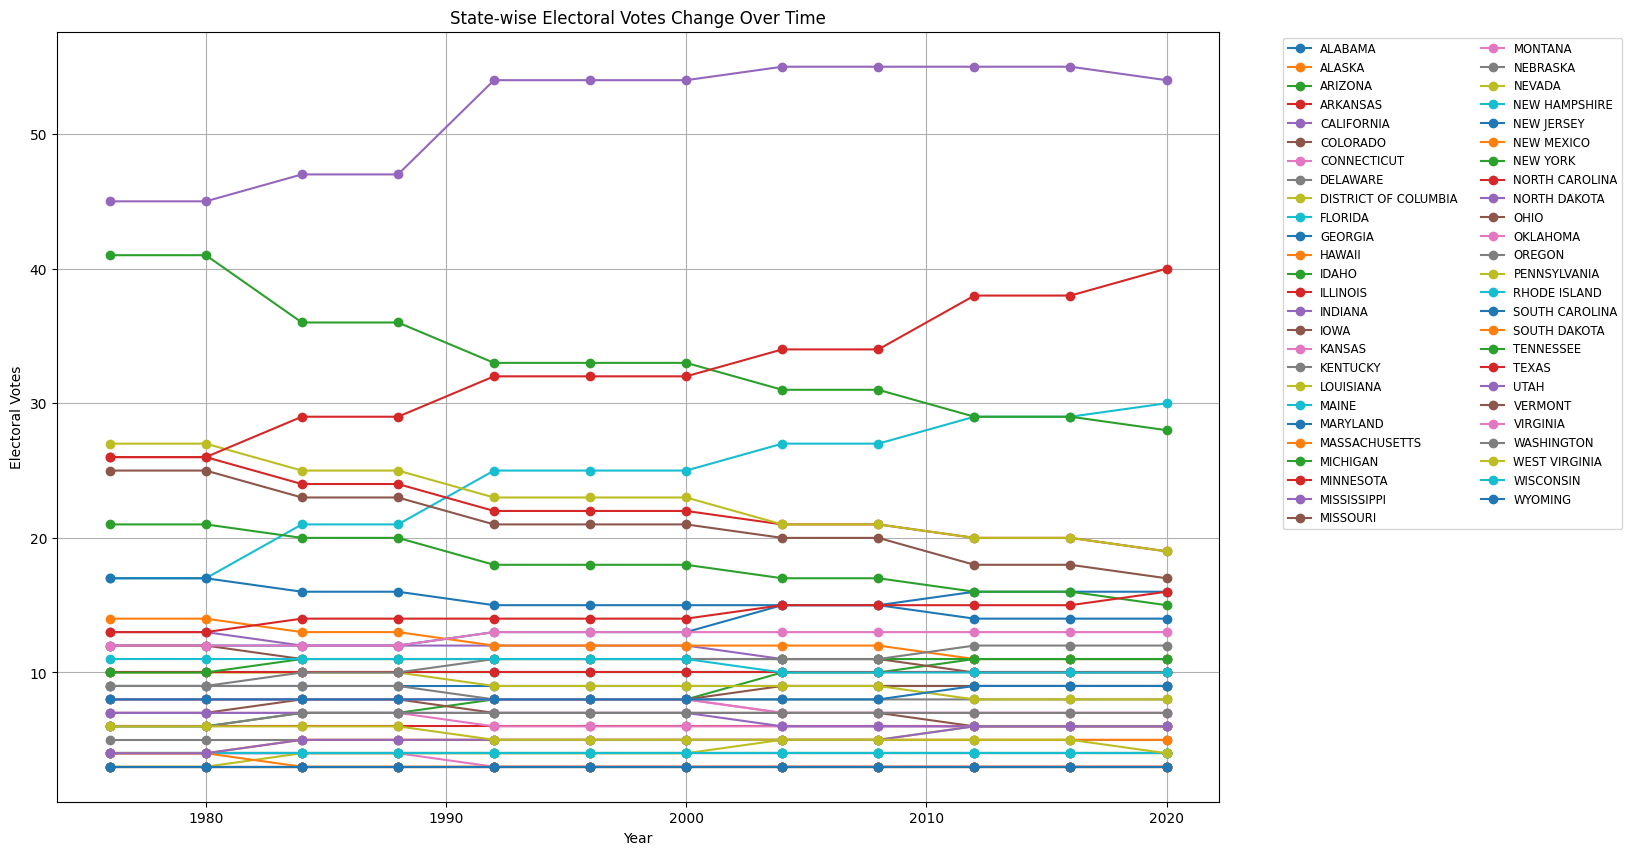

In [ ]:
# Nurodykite failo kelią, kuriame yra rinkimų duomenys su electoral_votes stulpeliu
prezidento_failo_kelias = "C:\\Users\\Paulius\\Duomenu mokslas\\projektas_US_rinkimai\\1976-2020-president.csv"

# Nuskaitome failą
rinkimu_duomenys = pd.read_csv(prezidento_failo_kelias)

# Grupavimas pagal metus ir valstijas, kad nustatytume bendrą kiekvienos valstijos electoral_votes kiekvienais metais
state_electoral_trends = rinkimu_duomenys.groupby(["year", "state"])["electoral_votes"].max().unstack()

# Apskaičiuojame bendrą electoral_votes skaičių kiekvienais metais
total_electoral_votes_per_year = state_electoral_trends.sum(axis=1)

# Braižome kiekvienos valstijos electoral_votes pokytį per metus
plt.figure(figsize=(15, 10))
for state in state_electoral_trends.columns:
    plt.plot(state_electoral_trends.index, state_electoral_trends[state], label=state, linestyle="-", marker="o")

plt.title("State-wise Electoral Votes Change Over Time")
plt.xlabel("Year")
plt.ylabel("Electoral Votes")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize="small", ncol=2)
plt.grid(True)
plt.show()

In [27]:
# import pandas as pd

# # Nurodykite failų kelius
# prezidento_failo_kelias = "C:\\Users\\Paulius\\Duomenu mokslas\\projektas_US_rinkimai\\1976-2020-president.csv"
# electoral_failo_kelias = "C:\\Users\\Paulius\\Duomenu mokslas\\projektas_US_rinkimai\\electoral_collage_numbers.csv"

# # Nuskaitome abu failus
# rinkimu_duomenys = pd.read_csv(prezidento_failo_kelias)
# electoral_data = pd.read_csv(electoral_failo_kelias)

# # Normalizuojame valstijų pavadinimus į didžiąsias raides, kad jie sutaptų
# electoral_data["State"] = electoral_data["State"].str.upper()

# # Pakeičiame electoral data struktūrą į tinkamą formatą (state, year, electoral_votes)
# electoral_data = electoral_data.melt(id_vars=["State"], var_name="year", value_name="electoral_votes")
# electoral_data["year"] = electoral_data["year"].astype(int)

# # Sujungiame prezidento rinkimų duomenis su electoral votes pagal valstiją ir metus
# atnaujinti_duomenys = rinkimu_duomenys.merge(electoral_data, left_on=["state", "year"], right_on=["State", "year"], how="left")

# # Pakeičiame seną electoral_votes stulpelį naujais duomenimis
# atnaujinti_duomenys["electoral_votes"] = atnaujinti_duomenys["electoral_votes_y"]

# # Pašaliname nereikalingus stulpelius, jei jie egzistuoja
# stulpeliai_pasalinti = ["electoral_votes_x", "electoral_votes_y", "State"]
# atnaujinti_duomenys = atnaujinti_duomenys.drop(columns=[col for col in stulpeliai_pasalinti if col in atnaujinti_duomenys.columns])

# # Išsaugome atnaujintą failą
# naujas_failo_kelias = "C:\\Users\\Paulius\\Duomenu mokslas\\projektas_US_rinkimai\\1976-2020-president-atnaujintas.csv"
# atnaujinti_duomenys.to_csv(naujas_failo_kelias, index=False)

# print(f"Atnaujinti duomenys išsaugoti faile: {naujas_failo_kelias}")


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1. Įkelkite duomenis
df = pd.read_csv("1976-2020-president.csv")  # Pakeistas failo pavadinimas

# 2. Pasirinkite požymius klasterizacijai
# Galimi požymiai: totalvotes, year, candidatevotes, etc.
features = ["totalvotes", "year", "candidatevotes"]

# Paruoškite duomenis
X = df[features]

# 3. Normalizuokite duomenis
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# klasterių skaičių iš „alkūnės metodo“ 
kmeans = KMeans(n_clusters=8, random_state=42)

# Priskirkite klasterius duomenims
df["cluster"] = kmeans.fit_predict(X_scaled)

# Patikrinkite klasterių paskirstymą
print(df["cluster"].value_counts())

# Vizualizuokite klasterius (pvz., pagal year ir totalvotes)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="totalvotes", y="year", hue="cluster", palette="deep")
plt.title("Prezidento rinkimų klasterizacija")
plt.xlabel("Bendras balsų skaičius")
plt.ylabel("Metai")
plt.legend(title="Klasteris")
plt.show()


In [ ]:
# # 1. pakeiciu is pavadinimu i skaitines reiksmes ir sukuriu stulpeili partija_numeric
# party_map = {
#     "DEMOCRAT": 0,
#     "REPUBLICAN": 1,
#     "OTHER": 2,
#     "LIBERTARIAN": 3
# }

# # 2. Sukurkite naują stulpelį naudodami žemėlapį
# df["partija_numeric"] = df["party_simplified"].map(party_map)

# # 3. Patikrinkite, ar stulpelis teisingai sukurtas
# print(df[["party_simplified", "partija_numeric"]].drop_duplicates())

# # 4. Išsaugokite atnaujintą CSV failą
# df.to_csv("1976-2020-president.csv", index=False)

# print("Naujas stulpelis "partija_numeric" pridėtas ir failas išsaugotas.")


  party_simplified  partija_numeric
0         DEMOCRAT                0
1       REPUBLICAN                1
2            OTHER                2
5      LIBERTARIAN                3
Naujas stulpelis 'partija_numeric' pridėtas ir failas išsaugotas.


cluster
 2    2516
 0     611
 1     611
 3     534
 4       8
-1       7
Name: count, dtype: int64


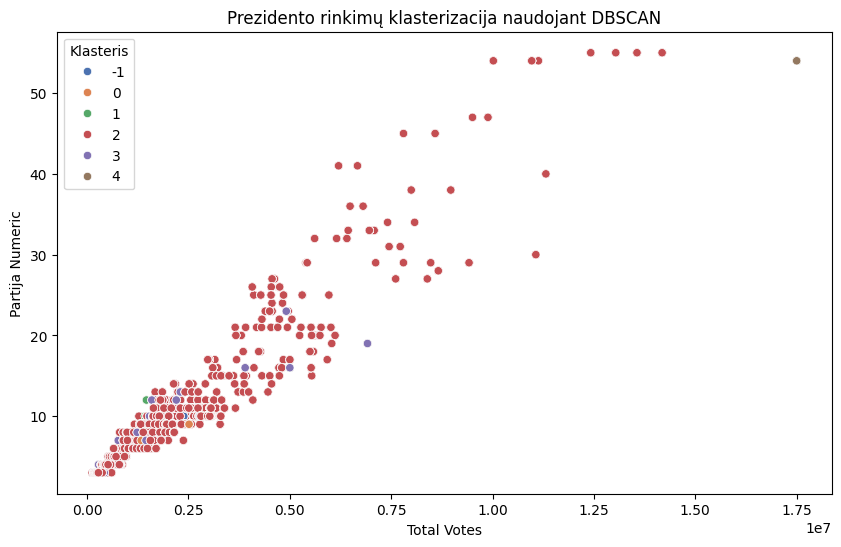

In [ ]:
# 1. Įkelkite duomenis
df = pd.read_csv("1976-2020-president.csv")

# 2. Pasirinkite požymius klasterizacijai
features = ["totalvotes", "partija_numeric", "electoral_votes","rinkejų_aktyvumas","partija_numeric"]
X = df[features]

# 3. Normalizuokite duomenis
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Sukurkite ir treniruokite DBSCAN modelį
dbscan_model = DBSCAN(eps=1.1, min_samples=4)
df["cluster"] = dbscan_model.fit_predict(X_scaled)

# DBSCAN priskiria -1 taškams, kurie yra laikomi "triukšmu" arba išskirtinėmis reikšmėmis
print(df["cluster"].value_counts())

# 5. Vizualizuokite klasterius su Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="totalvotes", y="electoral_votes", hue="cluster", palette="deep", legend="full")
plt.title("Prezidento rinkimų klasterizacija naudojant DBSCAN")
plt.xlabel("Total Votes")
plt.ylabel("Partija Numeric")
plt.legend(title="Klasteris")
plt.show()


In [ ]:
def plot_centroids(model, data, x_name, y_name):
    preds = model.fit_predict(data)
    sns.scatterplot(data=X, x=x_name, y=y_name, hue=preds)
    x = data.columns.get_loc(x_name)
    y = data.columns.get_loc(y_name)
    centers_x, centers_y = model.cluster_centers_[:,x], model.cluster_centers_[:,y]
    plt.plot(centers_x, centers_y, "xb")
plot_centroids(model, X, "sepal_length", "petal_length")


NameError: name 'model' is not defined


PCA su 2 komponentais
Paaiškinta dispersija: 0.76
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       179
           1       0.81      0.81      0.81       181
           2       1.00      1.00      1.00       761
           3       1.00      0.99      0.99       166

    accuracy                           0.94      1287
   macro avg       0.90      0.90      0.90      1287
weighted avg       0.94      0.94      0.94      1287


PCA su 3 komponentais
Paaiškinta dispersija: 0.96
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       179
           1       0.83      0.80      0.82       181
           2       0.99      1.00      1.00       761
           3       1.00      0.98      0.99       166

    accuracy                           0.95      1287
   macro avg       0.91      0.91      0.91      1287
weighted avg       0.95      0.95      0.95      1287


PCA su 4 komponentais
Paaiš

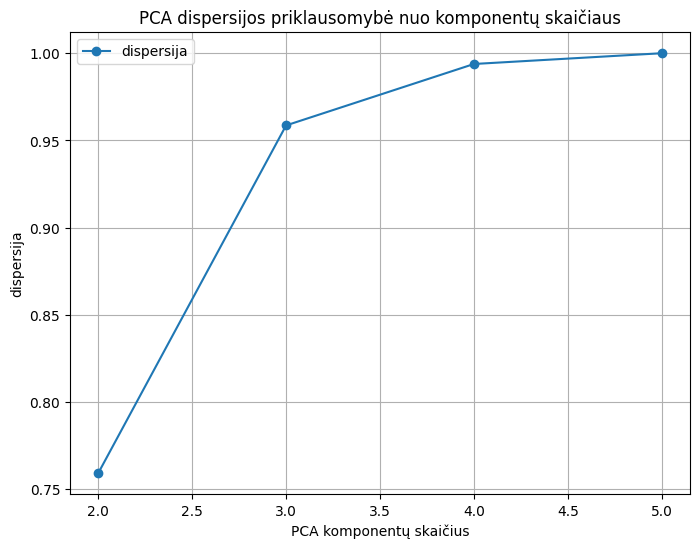

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# 1. Įkelkite duomenis
df = pd.read_csv("1976-2020-president.csv")

# 2. Pasirinkite požymius klasterizacijai
features = ["totalvotes", "partija_numeric", "year", "electoral_votes", "rinkejų_aktyvumas"]
X = df[features]
y = df["partija_numeric"]  # Naudokime partijos informaciją kaip tikslinę reikšmę klasifikacijai

# 3. Normalizuokite duomenis
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. PCA taikymas ir skirtingų komponentų skaičių bandymas
explained_variances = []
for n_components in [2, 3, 4, 5]:  # Bandykime skirtingą komponentų skaičių
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)
    
    # Išveskite PCA paaiškintą dispersiją
    explained_variances.append(sum(pca.explained_variance_ratio_))
    
    # Sukurkite treniravimo ir testavimo rinkinius
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)
    
    # 5. Treniravimo modelis su RandomForestClassifier
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train, y_train)
    
    # Testavimas ir rezultatai
    y_pred = clf.predict(X_test)
    print(f"\nPCA su {n_components} komponentais")
    print(f"Paaiškinta dispersija: {sum(pca.explained_variance_ratio_):.2f}")
    print(classification_report(y_test, y_pred))

# 6. Paaiškintos dispersijos vizualizacija
plt.figure(figsize=(8, 6))
components = [2, 3, 4, 5]
plt.plot(components, explained_variances, "-o", label="dispersija")
plt.xlabel("PCA komponentų skaičius")
plt.ylabel("dispersija")
plt.title("PCA dispersijos priklausomybė nuo komponentų skaičiaus")
plt.grid(True)
plt.legend()
plt.show()


In [2]:
# pip install graphviz


Note: you may need to restart the kernel to use updated packages.


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.base import clone
from sklearn.metrics import accuracy_score, classification_report

# Sukuriame parametrų paieškos erdvę MLP klasifikatoriui
param_grid = {
    "classifier__hidden_layer_sizes": [(50, 50), (100, 50), (100, 100)],
    "classifier__activation": ["tanh", "relu"],
    "classifier__solver": ["sgd", "adam"],
    "classifier__alpha": [0.0001, 0.05],
    "classifier__learning_rate": ["constant", "adaptive"],
}

# Nustatome GridSearchCV su 5 kryžminės patikros kartotėmis
grid_search = GridSearchCV(estimator=clone(mlp_pipeline), param_grid=param_grid, cv=5, scoring="accuracy", n_jobs=-1)

# Paleidžiame paiešką su prezidento rinkimų duomenų mokymo rinkiniu
grid_search.fit(X_train, y_train)

# Geriausi hiperparametrai
print("Geriausi Hiperparametrai:", grid_search.best_params_)
print("Geriausias Tikslumas:", grid_search.best_score_)

# Naudojame geriausią modelį prognozėms ir įvertiname testavimo rinkinyje
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Tikslumas ir klasifikacijos ataskaita testavimo rinkiniui
print(f"Modelio tikslumas su geriausiais hiperparametrais: {accuracy_score(y_test, y_pred):.2f}")
print("Klasifikacijos ataskaita su geriausiais hiperparametrais:")
print(classification_report(y_test, y_pred))


Geriausi Hiperparametrai: {'classifier__activation': 'tanh', 'classifier__alpha': 0.0001, 'classifier__hidden_layer_sizes': (50, 50), 'classifier__learning_rate': 'constant', 'classifier__solver': 'sgd'}
Geriausias Tikslumas: 0.8571011470281544
Modelio tikslumas su geriausiais hiperparametrais: 0.86
Klasifikacijos ataskaita su geriausiais hiperparametrais:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       736
           1       0.00      0.00      0.00       122

    accuracy                           0.86       858
   macro avg       0.43      0.50      0.46       858
weighted avg       0.74      0.86      0.79       858



c:\Users\Paulius\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Paulius\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Paulius\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [ ]:
import pandas as pd
from pytrends.request import TrendReq
import time

# Sukuriame „pytrends“ užklausos objektą
pytrends = TrendReq(hl="en-US", tz=360)

# Funkcija gauti paieškos duomenis kandidatams per laiką ir valstiją
def gauti_paieskos_duomenis(kandidatas, geo, year):
    if year < 2004:
        # Jei metai yra prieš 2004, grąžiname None arba 0 (pagal poreikį)
        return None  # Arba galite naudoti 0, pvz., `return 0`
    
    start_date = f"{year}-09-01"
    end_date = f"{year}-10-31"
    try:
        pytrends.build_payload([kandidatas], timeframe=f"{start_date} {end_date}", geo=geo)
        data = pytrends.interest_over_time()
        if not data.empty:
            return data[kandidatas].sum()  # Grąžiname bendrą paieškų skaičių per nurodytą laikotarpį
        else:
            return 0  # Jei duomenų nėra, grąžiname 0
    except Exception as e:
        print(f"Klaida gauti duomenis kandidatui {kandidatas} ({geo}, {year}): {e}")
        return None

# Nurodykite savo naujo CSV failo kelią su prezidento rinkimų duomenimis
failo_kelias = "C:\\Users\\Paulius\\Duomenu mokslas\\projektas_US_rinkimai\\1976-2020-president.csv"
president_data = pd.read_csv(failo_kelias)

# Pridėkite paieškų duomenis su pauze tarp užklausų
president_data["populiarumas_google"] = None  # Sukuriame naują stulpelį

for i, row in president_data.iterrows():
    kandidatas = row["candidate"]
    geo = f"US-{row["state_po"]}"
    year = row["year"]
    paieskos_kiekis = gauti_paieskos_duomenis(kandidatas, geo, year)
    president_data.at[i, "populiarumas_google"] = paieskos_kiekis
    
    # Pauzė tarp užklausų (pvz., 5 sekundės)
    time.sleep(5)

# Išsaugome atnaujintą failą
naujas_failo_kelias = "C:\\Users\\Paulius\\Duomenu mokslas\\projektas_US_rinkimai\\1976-2020-president_atnaujintas.csv"
president_data.to_csv(naujas_failo_kelias, index=False)

print("Duomenys išsaugoti su pridėtu "populiarumas_google" stulpeliu!")


Klaida gauti duomenis kandidatui BALDWIN, CHARLES ""CHUCK"" (US-AK, 2008): The request failed: Google returned a response with code 400
Klaida gauti duomenis kandidatui BALDWIN, CHARLES ""CHUCK"" (US-AR, 2008): The request failed: Google returned a response with code 400
Klaida gauti duomenis kandidatui BALDWIN, CHARLES ""CHUCK"" (US-CO, 2008): The request failed: Google returned a response with code 400
Klaida gauti duomenis kandidatui BALDWIN, CHARLES ""CHUCK"" (US-DE, 2008): The request failed: Google returned a response with code 400
Klaida gauti duomenis kandidatui BALDWIN, CHARLES ""CHUCK"" (US-FL, 2008): The request failed: Google returned a response with code 400
Klaida gauti duomenis kandidatui BALDWIN, CHARLES ""CHUCK"" (US-HI, 2008): The request failed: Google returned a response with code 400
Klaida gauti duomenis kandidatui BALDWIN, CHARLES ""CHUCK"" (US-ID, 2008): The request failed: Google returned a response with code 400
Klaida gauti duomenis kandidatui BALDWIN, CHARLE

KeyboardInterrupt: 

In [ ]:
import pandas as pd
from pytrends.request import TrendReq
import time
import re

# Sukuriame „pytrends“ užklausos objektą
pytrends = TrendReq(hl="en-US", tz=360)

# Funkcija, skirta pašalinti specialiuosius simbolius iš kandidato vardo
def isvalyti_kandidato_varda(vardas):
    return re.sub(r"[^a-zA-Z0-9\s]", "", vardas)

# Funkcija gauti paieškos duomenis kandidatams per laiką
def gauti_paieskos_duomenis(kandidatas, year):
    if year < 2004:
        return None
    
    kandidatas = isvalyti_kandidato_varda(kandidatas)
    start_date = f"{year}-09-01"
    end_date = f"{year}-10-31"
    try:
        pytrends.build_payload([kandidatas], timeframe=f"{start_date} {end_date}")
        data = pytrends.interest_over_time()
        if not data.empty:
            return data[kandidatas].sum()  # Grąžiname bendrą paieškų skaičių per nurodytą laikotarpį
        else:
            return 0
    except Exception as e:
        print(f"Klaida gauti duomenis kandidatui {kandidatas} ({year}): {e}")
        return None

# Nurodykite CSV failo kelią su prezidento rinkimų duomenimis
failo_kelias = "C:\\Users\\Paulius\\Duomenu mokslas\\projektas_US_rinkimai\\1976-2020-president.csv"
president_data = pd.read_csv(failo_kelias)

# Sukuriame stulpelį "populiarumas_google", kuris saugos paieškų duomenis
president_data["populiarumas_google"] = None

# Išrenkame unikalius kandidatus kiekvienais metais
unique_candidates = president_data[["candidate", "year"]].drop_duplicates()

# Renkame Google Trends duomenis tik unikaliems kandidatams kiekvienais metais
populiarumo_duomenys = {}
for _, row in unique_candidates.iterrows():
    kandidatas = row["candidate"]
    year = row["year"]
    paieskos_kiekis = gauti_paieskos_duomenis(kandidatas, year)
    
    # Išsaugome duomenis pagal kandidatą ir metus
    populiarumo_duomenys[(kandidatas, year)] = paieskos_kiekis
    
    # Pauzė tarp užklausų (pvz., 5 sekundės)
    time.sleep(5)

# Priskiriame surinktus paieškos duomenis atitinkamoms kandidatų eilutėms
for i, row in president_data.iterrows():
    kandidatas = row["candidate"]
    year = row["year"]
    president_data.at[i, "populiarumas_google"] = populiarumo_duomenys.get((kandidatas, year))

# Išsaugome atnaujintą failą
naujas_failo_kelias = "C:\\Users\\Paulius\\Duomenu mokslas\\projektas_US_rinkimai\\1976-2020-president_atnaujintas.csv"
president_data.to_csv(naujas_failo_kelias, index=False)

print("Duomenys išsaugoti su pridėtu "populiarumas_google" stulpeliu!")


TypeError: expected string or bytes-like object, got 'float'

In [ ]:
import pandas as pd
from pytrends.request import TrendReq
import time
import re

# Create a "pytrends" request object
pytrends = TrendReq(hl="en-US", tz=360)

# Function to clean candidate name by removing special characters
def isvalyti_kandidato_varda(vardas):
    if isinstance(vardas, str):  # Only clean if "vardas" is a string
        return re.sub(r"[^a-zA-Z0-9\s]", "", vardas)
    else:
        return ""  # Return empty string or handle as needed for non-string cases

# Function to get search data for candidates over time
def gauti_paieskos_duomenis(kandidatas, year):
    if year < 2004:
        return None
    
    kandidatas = isvalyti_kandidato_varda(kandidatas)
    start_date = f"{year}-09-01"
    end_date = f"{year}-10-31"
    try:
        pytrends.build_payload([kandidatas], timeframe=f"{start_date} {end_date}")
        data = pytrends.interest_over_time()
        if not data.empty:
            return data[kandidatas].sum()  # Return total search count over the specified period
        else:
            return 0
    except Exception as e:
        print(f"Error retrieving data for candidate {kandidatas} ({year}): {e}")
        return None

# Specify the path to the CSV file with presidential election data
failo_kelias = "C:\\Users\\Paulius\\Duomenu mokslas\\projektas_US_rinkimai\\1976-2020-president.csv"
president_data = pd.read_csv(failo_kelias)

# Create a column "populiarumas_google" to store search data
president_data["populiarumas_google"] = None

# Extract unique candidates for each year
unique_candidates = president_data[["candidate", "year"]].drop_duplicates()

# Collect Google Trends data for unique candidates in each year
populiarumo_duomenys = {}
for _, row in unique_candidates.iterrows():
    kandidatas = row["candidate"]
    year = row["year"]
    paieskos_kiekis = gauti_paieskos_duomenis(kandidatas, year)
    
    # Save data by candidate and year
    populiarumo_duomenys[(kandidatas, year)] = paieskos_kiekis
    
    # Pause between requests (e.g., 5 seconds)
    time.sleep(5)

# Assign collected search data to the corresponding candidate rows
for i, row in president_data.iterrows():
    kandidatas = row["candidate"]
    year = row["year"]
    president_data.at[i, "populiarumas_google"] = populiarumo_duomenys.get((kandidatas, year))

# Save the updated file
naujas_failo_kelias = "C:\\Users\\Paulius\\Duomenu mokslas\\projektas_US_rinkimai\\1976-2020-president_atnaujintas.csv"
president_data.to_csv(naujas_failo_kelias, index=False)

print("Data saved with the added "populiarumas_google" column!")



Data saved with the added 'populiarumas_google' column!


In [ ]:
import pandas as pd

# Load the presidential election data
failo_kelias = "C:\\Users\\Paulius\\Duomenu mokslas\\projektas_US_rinkimai\\1976-2020-president.csv"
president_data = pd.read_csv(failo_kelias)

# Get a list of unique candidate names
unique_candidates = president_data["candidate"].drop_duplicates().reset_index(drop=True)
print("List of unique presidential candidates:")
print(unique_candidates)

# Display the list of unique candidates for manual entry of birth years
# At this point, you can use the unique_candidates DataFrame to look up birth years for each candidate


List of unique presidential candidates:
0                CARTER, JIMMY
1                 FORD, GERALD
2               MADDOX, LESTER
3      BUBAR, BENJAMIN ""BEN""
4                    HALL, GUS
                ...           
266           PAIGE, BROOKE H.
267    LAFONTAINE, CHRISTOPHER
268                SWING, GARY
269            MCCORMIC, KEITH
270             SCALF, ZACHARY
Name: candidate, Length: 271, dtype: object


In [ ]:
# !pip install wikipedia-api

In [ ]:
# Install wikipedia-api if running in Google Colab or if not already installed
!pip install wikipedia-api

import pandas as pd
import wikipediaapi
import re

# Load the presidential election data
failo_kelias = "C:\\Users\\Paulius\\Duomenu mokslas\\projektas_US_rinkimai\\1976-2020-president.csv"
president_data = pd.read_csv(failo_kelias)

# Get a list of unique candidate names, excluding NaN values
unique_candidates = president_data["candidate"].dropna().drop_duplicates().reset_index(drop=True)

# Initialize the Wikipedia API with a custom User-Agent
user_agent = "YourAppName/1.0 (your_email@example.com)"  # Replace with your own app name and contact info
wiki = wikipediaapi.Wikipedia("en", headers={"User-Agent": user_agent})

# Define a function to fetch birth year from Wikipedia
def get_birth_year(candidate_name):
    # Ensure candidate_name is a string before processing
    if not isinstance(candidate_name, str):
        return None

    # Clean candidate name for search
    candidate_name_cleaned = re.sub(r"[^a-zA-Z\s]", "", candidate_name)  # Remove punctuation for cleaner search
    page = wiki.page(candidate_name_cleaned)
    if page.exists():
        # Try to find the birth year by checking the intro text
        intro_text = page.summary
        match = re.search(r"\b(18|19|20)\d{2}\b", intro_text)  # Search for a year in a typical birth year range
        if match:
            return int(match.group())
    return None

# Fetch birth years for each unique candidate
birth_years = {name: get_birth_year(name) for name in unique_candidates}
print("Fetched birth years for candidates:")
print(birth_years)

# Map birth years to the main dataset
president_data["birth_year"] = president_data["candidate"].map(birth_years)

# Calculate the candidate"s age during each election year
president_data["age"] = president_data["year"] - president_data["birth_year"]

# Display the updated DataFrame with birth year and age
print(president_data[["candidate", "year", "birth_year", "age"]])

# Save the updated DataFrame to a new CSV file
updated_file_path = "C:\\Users\\Paulius\\Duomenu mokslas\\projektas_US_rinkimai\\1976-2020-president_with_age.csv"
president_data.to_csv(updated_file_path, index=False)
print(f"Updated data with birth years and ages saved to {updated_file_path}")



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Fetched birth years for candidates:
{'CARTER, JIMMY': None, 'FORD, GERALD': None, 'MADDOX, LESTER': None, 'BUBAR, BENJAMIN ""BEN""': None, 'HALL, GUS': None, 'MACBRIDE, ROGER': None, 'MCCARTHY, EUGENE ""GENE""': None, 'CAMEJO, PETER': None, 'ANDERSON, THOMAS J.': None, 'WRIGHT, MARGARET': None, 'LAROUCHE, LYNDON, JR.': None, 'SCATTERING': None, 'OTHER': None, 'JULIUS ""JULES"", LEVIN': None, 'ZEIDLER, FRANK': None, 'REAGAN, RONALD': None, 'ANDERSON, JOHN B.': None, 'RARICK, JOHN': None, 'CLARK, EDWARD ""ED""': None, 'DEBERRY, CLIFTON': None, 'MCREYNOLDS, DAVID': None, 'COMMONER, BARRY': None, 'GRISWOLD, DEIRDRE': None, 'SMITH, MAUREEN': None, 'PULLEY, ANDREW': None, 'GREAVES, PERCY L, JR.': None, 'SHELTON, FRANK, JR.': None, 'MCCORMACK, ELLEN': None, 'LYNEN, KURT': None, 'GAHRES, WILLIAM ""BILL""': None, 'WENDELKEN, MARTIN E.': None, 'MCLAIN, HARLEY': None, 'CONGRESS, RICHARD': None, 'MONDALE, WALTER': None, 'BERGLAND, DAVID': None, 'RICHARDS, BOB': None, 'MASON, MELVIN': None, 'SERRET

In [ ]:
import pandas as pd
import wikipediaapi
import re

# Load the presidential election data
failo_kelias = "C:\\Users\\Paulius\\Duomenu mokslas\\projektas_US_rinkimai\\1976-2020-president.csv"
president_data = pd.read_csv(failo_kelias)

# Get a list of unique candidate names, excluding NaN values
unique_candidates = president_data["candidate"].dropna().drop_duplicates().reset_index(drop=True)

# Initialize the Wikipedia API with a custom User-Agent
user_agent = "YourAppName/1.0 (your_email@example.com)"  # Replace with your own app name and contact info
wiki = wikipediaapi.Wikipedia("en", headers={"User-Agent": user_agent})

# Define a function to fetch birth year from Wikipedia with fallback strategies
def get_birth_year(candidate_name):
    # Clean candidate name for search
    candidate_name_cleaned = re.sub(r"[^a-zA-Z\s]", "", candidate_name).strip()  # Remove punctuation for cleaner search
    
    # First attempt with the full cleaned name
    page = wiki.page(candidate_name_cleaned)
    if page.exists():
        birth_year = extract_birth_year(page.summary)
        if birth_year:
            return birth_year

    # If the first attempt fails, try simplifying the name (e.g., removing middle names or nicknames)
    simplified_name = candidate_name_cleaned.split(",")[0].split()[0]  # Take first part of the name only
    page = wiki.page(simplified_name)
    if page.exists():
        birth_year = extract_birth_year(page.summary)
        if birth_year:
            return birth_year

    # If no birth year is found, return None
    print(f"Birth year not found for candidate: {candidate_name}")
    return None

# Helper function to extract a birth year from text
def extract_birth_year(text):
    match = re.search(r"\b(18|19|20)\d{2}\b", text)  # Look for a year in the range of typical birth years
    if match:
        return int(match.group())
    return None

# Fetch birth years for each unique candidate
birth_years = {name: get_birth_year(name) for name in unique_candidates}
print("Fetched birth years for candidates:")
print(birth_years)

# Map birth years to the main dataset
president_data["birth_year"] = president_data["candidate"].map(birth_years)

# Calculate the candidate"s age during each election year
president_data["age"] = president_data["year"] - president_data["birth_year"]

# Display the updated DataFrame with birth year and age
print(president_data[["candidate", "year", "birth_year", "age"]])

# Save the updated DataFrame to a new CSV file
updated_file_path = "C:\\Users\\Paulius\\Duomenu mokslas\\projektas_US_rinkimai\\1976-2020-president_with_age.csv"
president_data.to_csv(updated_file_path, index=False)
print(f"Updated data with birth years and ages saved to {updated_file_path}")


Birth year not found for candidate: CARTER, JIMMY
Birth year not found for candidate: MADDOX, LESTER
Birth year not found for candidate: BUBAR, BENJAMIN ""BEN""
Birth year not found for candidate: HALL, GUS
Birth year not found for candidate: MACBRIDE, ROGER
Birth year not found for candidate: MCCARTHY, EUGENE ""GENE""
Birth year not found for candidate: CAMEJO, PETER
Birth year not found for candidate: ANDERSON, THOMAS J.
Birth year not found for candidate: WRIGHT, MARGARET
Birth year not found for candidate: LAROUCHE, LYNDON, JR.
Birth year not found for candidate: SCATTERING
Birth year not found for candidate: OTHER
Birth year not found for candidate: JULIUS ""JULES"", LEVIN
Birth year not found for candidate: ZEIDLER, FRANK
Birth year not found for candidate: REAGAN, RONALD
Birth year not found for candidate: ANDERSON, JOHN B.
Birth year not found for candidate: RARICK, JOHN
Birth year not found for candidate: CLARK, EDWARD ""ED""
Birth year not found for candidate: DEBERRY, CLIFTO

KeyboardInterrupt: 

In [ ]:
import pandas as pd
import re
import wikipediaapi

# Load the election data
file_path = "C:\\Users\\Paulius\\Duomenu mokslas\\projektas_US_rinkimai\\1976-2020-president.csv"
election_data = pd.read_csv(file_path)

# Initialize Wikipedia API with custom User-Agent
user_agent = "uselectionproject/1.0 (pasaulio.ismintis@gmail.com)"
wiki = wikipediaapi.Wikipedia("en", headers={"User-Agent": user_agent})

# Clean candidate names for better search accuracy
def clean_candidate_name(name):
    if pd.isna(name):
        return None
    name = re.sub(r""", "", name)  # Remove extra quotes
    name = re.sub(r",? (Jr\.|Sr\.|III|II)$", "", name, flags=re.IGNORECASE)  # Remove suffixes
    return name.strip()

# Get unique candidates and clean their names
unique_candidates = election_data["candidate"].dropna().apply(clean_candidate_name).drop_duplicates()

# Manual birth years for known candidates
manual_birth_years = {
    "CARTER, JIMMY": 1924,
    "FORD, GERALD": 1913,
    "REAGAN, RONALD": 1911,
    "CLINTON, BILL": 1946,
    "OBAMA, BARACK H.": 1961,
    "TRUMP, DONALD J.": 1946,
    # Add other known candidates as needed
}

# Function to fetch birth year from Wikipedia
def get_birth_year(name):
    if name in manual_birth_years:
        return manual_birth_years[name]
    
    page = wiki.page(name)
    if page.exists():
        match = re.search(r"\b(18|19|20)\d{2}\b", page.summary)  # Find year in Wikipedia summary
        if match:
            return int(match.group())
    return None

# Fetch birth years for each unique candidate, using Wikipedia API if not in manual list
birth_years = {name: get_birth_year(name) for name in unique_candidates}
print("Birth years fetched for candidates:")
print(birth_years)

# Map birth years to the main dataset
election_data["birth_year"] = election_data["candidate"].apply(lambda x: birth_years.get(clean_candidate_name(x), None))

# Calculate age
election_data["age"] = election_data.apply(lambda row: row["year"] - row["birth_year"] if pd.notna(row["birth_year"]) else None, axis=1)

# Display the updated DataFrame with birth year and age
print(election_data[["candidate", "year", "birth_year", "age"]])

# Save to a new CSV
updated_file_path = "C:\\Users\\Paulius\\Duomenu mokslas\\projektas_US_rinkimai\\1976-2020-president_with_age.csv"
election_data.to_csv(updated_file_path, index=False)
print(f"Updated data with birth years and ages saved to {updated_file_path}")


Birth years fetched for candidates:
{'CARTER, JIMMY': 1924, 'FORD, GERALD': 1913, 'MADDOX, LESTER': None, 'BUBAR, BENJAMIN BEN': None, 'HALL, GUS': None, 'MACBRIDE, ROGER': None, 'MCCARTHY, EUGENE GENE': None, 'CAMEJO, PETER': None, 'ANDERSON, THOMAS J.': None, 'WRIGHT, MARGARET': None, 'LAROUCHE, LYNDON': None, 'SCATTERING': None, 'OTHER': None, 'JULIUS JULES, LEVIN': None, 'ZEIDLER, FRANK': None, 'REAGAN, RONALD': 1911, 'ANDERSON, JOHN B.': None, 'RARICK, JOHN': None, 'CLARK, EDWARD ED': None, 'DEBERRY, CLIFTON': None, 'MCREYNOLDS, DAVID': None, 'COMMONER, BARRY': None, 'GRISWOLD, DEIRDRE': None, 'SMITH, MAUREEN': None, 'PULLEY, ANDREW': None, 'GREAVES, PERCY L': None, 'SHELTON, FRANK': None, 'MCCORMACK, ELLEN': None, 'LYNEN, KURT': None, 'GAHRES, WILLIAM BILL': None, 'WENDELKEN, MARTIN E.': None, 'MCLAIN, HARLEY': None, 'CONGRESS, RICHARD': None, 'MONDALE, WALTER': None, 'BERGLAND, DAVID': None, 'RICHARDS, BOB': None, 'MASON, MELVIN': None, 'SERRETTE, DENNIS': None, 'JOHNSON, SONIA'

In [ ]:
import pandas as pd
import re
import wikipediaapi

# Load the election data
file_path = "C:\\Users\\Paulius\\Duomenu mokslas\\projektas_US_rinkimai\\1976-2020-president.csv"
election_data = pd.read_csv(file_path)

# Initialize Wikipedia API with custom User-Agent
user_agent = "YourAppName/1.0 (your_email@example.com)"
wiki = wikipediaapi.Wikipedia("en", headers={"User-Agent": user_agent})

# Clean candidate names for better search accuracy
def clean_candidate_name(name):
    if pd.isna(name):
        return None
    name = re.sub(r""", "", name)  # Remove extra quotes
    name = re.sub(r",? (Jr\.|Sr\.|III|II)$", "", name, flags=re.IGNORECASE)  # Remove suffixes
    return name.strip()

# Get unique candidates and clean their names
unique_candidates = election_data["candidate"].dropna().apply(clean_candidate_name).drop_duplicates()

# Manual birth years for known candidates
manual_birth_years = {
    "CARTER, JIMMY": 1924,
    "FORD, GERALD": 1913,
    "REAGAN, RONALD": 1911,
    "CLINTON, BILL": 1946,
    "OBAMA, BARACK H.": 1961,
    "TRUMP, DONALD J.": 1946,
    "BIDEN, JOSEPH R. JR": 1942,
    # Add other known candidates as needed
}

# Function to fetch birth year from Wikipedia
def get_birth_year(name):
    if name in manual_birth_years:
        return manual_birth_years[name]
    
    page = wiki.page(name)
    if page.exists():
        match = re.search(r"\b(18|19|20)\d{2}\b", page.summary)  # Find year in Wikipedia summary
        if match:
            return int(match.group())
    return None

# Fetch birth years for each unique candidate, using Wikipedia API if not in manual list
birth_years = {name: get_birth_year(name) for name in unique_candidates}

# Identify candidates with missing birth years
missing_birth_years = {name: birth_years[name] for name in birth_years if birth_years[name] is None}

# Save the missing candidates to a CSV file for manual entry
missing_file_path = "C:\\Users\\Paulius\\Duomenu mokslas\\projektas_US_rinkimai\\missing_birth_years.csv"
pd.DataFrame(list(missing_birth_years.keys()), columns=["candidate"]).to_csv(missing_file_path, index=False)
print(f"Candidates with missing birth years saved to {missing_file_path}. Please add birth years manually and save.")

# Load the completed file with manually added birth years after you fill in missing_birth_years.csv
# This part assumes that you"ve entered birth years manually in the CSV and saved it
filled_birth_years = pd.read_csv(missing_file_path).set_index("candidate").to_dict()["birth_year"]

# Update birth_years dictionary with manually entered years
for candidate, birth_year in filled_birth_years.items():
    if pd.notna(birth_year):  # Only update if a birth year was provided
        birth_years[candidate] = int(birth_year)

# Map birth years to the main dataset
election_data["birth_year"] = election_data["candidate"].apply(lambda x: birth_years.get(clean_candidate_name(x), None))

# Calculate age if birth_year is available
election_data["age"] = election_data.apply(lambda row: row["year"] - row["birth_year"] if pd.notna(row["birth_year"]) else None, axis=1)

# Display the updated DataFrame with birth year and age
print(election_data[["candidate", "year", "birth_year", "age"]])

# Save to a new CSV
updated_file_path = "C:\\Users\\Paulius\\Duomenu mokslas\\projektas_US_rinkimai\\1976-2020-president_with_age.csv"
election_data.to_csv(updated_file_path, index=False)
print(f"Updated data with birth years and ages saved to {updated_file_path}")


Candidates with missing birth years saved to C:\Users\Paulius\Duomenu mokslas\projektas_US_rinkimai\missing_birth_years.csv. Please add birth years manually and save.


KeyError: 'birth_year'

KeyboardInterrupt: 

In [ ]:
import pandas as pd
import re
import wikipediaapi

# Load the election data
file_path = "C:\\Users\\Paulius\\Duomenu mokslas\\projektas_US_rinkimai\\1976-2020-president.csv"
election_data = pd.read_csv(file_path)

# Initialize Wikipedia API with custom User-Agent
user_agent = "YourAppName/1.0 (your_email@example.com)"
wiki = wikipediaapi.Wikipedia("en", headers={"User-Agent": user_agent})

# Clean candidate names for better search accuracy
def clean_candidate_name(name):
    if pd.isna(name):
        return None
    name = re.sub(r""", "", name)  # Remove extra quotes
    name = re.sub(r",? (Jr\.|Sr\.|III|II)$", "", name, flags=re.IGNORECASE)  # Remove suffixes
    return name.strip()

# Get unique candidates and clean their names
unique_candidates = election_data["candidate"].dropna().apply(clean_candidate_name).drop_duplicates()

# Define manually filled birth years
manual_birth_years = {
    "MADDOX, LESTER": 1915,
    "BUBAR, BENJAMIN BEN": 1917,
    "HALL, GUS": 1910,
    "MACBRIDE, ROGER": 1929,
    "MCCARTHY, EUGENE GENE": 1916,
    "CAMEJO, PETER": 1939,
    "ANDERSON, THOMAS J.": 1910,
    "WRIGHT, MARGARET": 1922,
    "LAROUCHE, LYNDON": 1922,
    "ZEIDLER, FRANK": 1912,
    "ANDERSON, JOHN B.": 1922,
    "RARICK, JOHN": 1924,
    "CLARK, EDWARD ED": 1930,
    "MCREYNOLDS, DAVID": 1929,
    "COMMONER, BARRY": 1917,
    "MONDALE, WALTER": 1928,
    "BERGLAND, DAVID": 1935,
    "JOHNSON, SONIA": 1936,
    "DODGE, EARL": 1932,
    "BUSH, GEORGE H.W.": 1924,
    "DUKAKIS, MICHAEL": 1933,
    "PAUL, RONALD RON": 1935,
    "FULANI, LENORA": 1950,
    "NADER, RALPH": 1934,
    "DOLE, ROBERT": 1923,
    "BROWNE, HARRY": 1933,
    "FORBES, RALPH": 1927,
    "PEROT, ROSS": 1930,
    "MARROU, ANDRE": 1938,
    "GRITZ, JAMES BO": 1939,
    "HAGELIN, JOHN": 1954,
    "PHILLIPS, HOWARD": 1941,
    "YIAMOUYIANNIS, JOHN": 1943,
    "MCKINNEY, CYNTHIA": 1955,
    "KEYES, ALAN": 1950,
    "ROMNEY, MITT": 1947,
    "JOHNSON, GARY": 1953,
    "STEIN, JILL": 1950,
    "BARR, ROSEANNE": 1952,
    "GOODE, VIRGIL HAMLIN": 1946,
    "REED, JILL ANN": 1960,
    "ALEXANDER, STEWART": 1951,
    "TERRY, RANDALL": 1959,
    "CARLSON, JIM": 1946,
    "CLINTON, HILLARY": 1947,
    "CASTLE, DARRELL L.": 1948,
    "DE LA FUENTE, ROQUE ROCKY": 1954,
    "MCMULLIN, EVAN": 1976,
    "KAHN, LYNN S.": 1943,
    "KOPITKE, KYLE KENLEY": 1961,
    "HEDGES, JAMES": 1957,
    "JORGENSEN, JO": 1957,
    "PIERCE, BROCK": 1980,
    "HAWKINS, HOWIE": 1952,
    "CARROLL, BRIAN": 1949,
    "WEST, KANYE": 1977,
    "YANG, ANDREW": 1975,
    "GABBARD, TULSI": 1981,
    "BUTTIGIEG, PETE": 1982,
    "HUCKABEE, MIKE": 1955,
    "SANDERS, BERNIE": 1941,
    "SUPREME, VERMIN": 1961,
    "WELD, BILL": 1945
}

# Function to fetch birth year from Wikipedia if not in manual list
def get_birth_year(name):
    if name in manual_birth_years:
        return manual_birth_years[name]
    
    page = wiki.page(name)
    if page.exists():
        match = re.search(r"\b(18|19|20)\d{2}\b", page.summary)  # Find year in Wikipedia summary
        if match:
            return int(match.group())
    return None

# Fetch birth years for each unique candidate, using Wikipedia API if not in manual list
birth_years = {name: get_birth_year(name) for name in unique_candidates}

# Map birth years to the main dataset
election_data["birth_year"] = election_data["candidate"].apply(lambda x: manual_birth_years.get(clean_candidate_name(x), None))

# Calculate age if birth_year is available
election_data["age"] = election_data.apply(lambda row: row["year"] - row["birth_year"] if pd.notna(row["birth_year"]) else None, axis=1)

# Save the completed data
updated_file_path = "C:\\Users\\Paulius\\Duomenu mokslas\\projektas_US_rinkimai\\1976-2020-president_with_age.csv"
election_data.to_csv(updated_file_path, index=False)
print(f"Updated data with birth years and ages saved to {updated_file_path}")


Updated data with birth years and ages saved to C:\Users\Paulius\Duomenu mokslas\projektas_US_rinkimai\1976-2020-president_with_age.csv


In [ ]:
# import pandas as pd

# # Load the data
# file_path = "C:\\Users\\Paulius\\Duomenu mokslas\\projektas_US_rinkimai\\1976-2020-president.csv"
# election_data = pd.read_csv(file_path)

# # Define a function to identify the winner within each year and state
# def mark_winner(group):
#     # Find the candidate with the maximum votes in the group
#     max_votes = group["candidatevotes"].max()
#     # Create a "laimetojas" column that is True for the candidate(s) with the most votes
#     group["laimetojas"] = group["candidatevotes"] == max_votes
#     return group

# # Apply the function to each year-state group
# election_data = election_data.groupby(["year", "state"], group_keys=False).apply(mark_winner)

# # Save the updated data to a new CSV file
# updated_file_path = "C:\\Users\\Paulius\\Duomenu mokslas\\projektas_US_rinkimai\\1976-2020-president.csv"
# election_data.to_csv(updated_file_path, index=False)
# print(f"Updated data with "laimetojas" column saved to {updated_file_path}")


Updated data with 'laimetojas' column saved to C:\Users\Paulius\Duomenu mokslas\projektas_US_rinkimai\1976-2020-president.csv


C:\Users\Paulius\AppData\Local\Temp\ipykernel_13680\3730909260.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  election_data = election_data.groupby(['year', 'state'], group_keys=False).apply(mark_winner)


In [1]:
import pandas as pd

# Load population data
population_file_path = r"C:\Users\Paulius\Duomenu mokslas\projektas_US_rinkimai\papildomi _duomenys\Population Estimates - US, States, Counties.csv"
population_data = pd.read_csv(population_file_path)

# Filter out U.S.-level data and aggregate county-level data to get state totals
population_data = population_data[(population_data['Description'] != 'U.S.') & (population_data['Countyfips'] != '000')]

# Aggregate county data to get total population for each state and year
state_population_data = (population_data.groupby(['Description', 'Year'], as_index=False)
                         .agg({'Population': 'sum'}))

# Rename columns for merging
state_population_data.columns = ['state', 'year', 'population']

# Load presidential election data
president_file_path = r"C:\Users\Paulius\Duomenu mokslas\projektas_US_rinkimai\1976-2020-president.csv"
president_data = pd.read_csv(president_file_path)

# Ensure consistent column types and case for merging
president_data['year'] = president_data['year'].astype(int)
state_population_data['year'] = state_population_data['year'].astype(int)
president_data['state'] = president_data['state'].str.upper()
state_population_data['state'] = state_population_data['state'].str.upper()

# Merge presidential data with state population data on 'state' and 'year'
merged_data = pd.merge(president_data, state_population_data, how='left', on=['state', 'year'])

# Sort by state and year to ensure proper filling
merged_data = merged_data.sort_values(['state', 'year']).reset_index(drop=True)

# Apply forward and backward filling across the entire population column
merged_data['population'] = merged_data['population'].fillna(method='ffill').fillna(method='bfill')

# Save the final merged data with filled population values
output_file_path = r"C:\Users\Paulius\Duomenu mokslas\projektas_US_rinkimai\1976-2020-president_with_population.csv"
merged_data.to_csv(output_file_path, index=False)
print(f"Merged presidential data with fully filled population column saved to {output_file_path}")


Merged presidential data with fully filled population column saved to C:\Users\Paulius\Duomenu mokslas\projektas_US_rinkimai\1976-2020-president_with_population.csv


C:\Users\Paulius\AppData\Local\Temp\ipykernel_9304\1348157404.py:34: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_data['population'] = merged_data['population'].fillna(method='ffill').fillna(method='bfill')


In [4]:
import pandas as pd

# File paths for each dataset
senate_original_path = r"C:\Users\Paulius\Duomenu mokslas\projektas_US_rinkimai\1976-2020-senate.csv"
senate_merged_path = r"C:\Users\Paulius\Duomenu mokslas\projektas_US_rinkimai\1976-2020-senate_with_population.csv"

president_original_path = r"C:\Users\Paulius\Duomenu mokslas\projektas_US_rinkimai\1976-2020-president.csv"
president_merged_path = r"C:\Users\Paulius\Duomenu mokslas\projektas_US_rinkimai\1976-2020-president_with_population.csv"

house_original_path = r"C:\Users\Paulius\Duomenu mokslas\projektas_US_rinkimai\house.csv"
house_merged_path = r"C:\Users\Paulius\Duomenu mokslas\projektas_US_rinkimai\1976-2020-house_with_population.csv"

# Function to update the original file with population data and rename to 'populiacija'
def update_with_population(original_path, merged_path):
    # Load the original data
    original_data = pd.read_csv(original_path)
    
    # Load the merged data with filled population
    merged_data = pd.read_csv(merged_path)
    
    # Ensure we only have relevant columns from the merged data
    merged_data = merged_data[['state', 'year', 'population']]
    
    # Rename 'population' column to 'populiacija' in the merged data
    merged_data = merged_data.rename(columns={'population': 'populiacija'})
    
    # Merge on 'state' and 'year' to bring the 'populiacija' column back to the original data
    updated_data = pd.merge(original_data, merged_data, on=['state', 'year'], how='left', suffixes=('', '_new'))
    
    # Replace or add the 'populiacija' column
    updated_data['populiacija'] = updated_data['populiacija_new']
    
    # Drop the extra column generated during merge
    updated_data = updated_data.drop(columns=['populiacija_new'])
    
    # Save the updated data back to the original path
    updated_data.to_csv(original_path, index=False)
    print(f"Updated file saved with 'populiacija' column to {original_path}")

# Update Senate, President, and House files
update_with_population(senate_original_path, senate_merged_path)
update_with_population(president_original_path, president_merged_path)
update_with_population(house_original_path, house_merged_path)


KeyError: 'populiacija_new'

In [5]:
import pandas as pd

# File paths for each dataset
senate_original_path = r"C:\Users\Paulius\Duomenu mokslas\projektas_US_rinkimai\1976-2020-senate.csv"
senate_merged_path = r"C:\Users\Paulius\Duomenu mokslas\projektas_US_rinkimai\1976-2020-senate_with_population.csv"

president_original_path = r"C:\Users\Paulius\Duomenu mokslas\projektas_US_rinkimai\1976-2020-president.csv"
president_merged_path = r"C:\Users\Paulius\Duomenu mokslas\projektas_US_rinkimai\1976-2020-president_with_population.csv"

house_original_path = r"C:\Users\Paulius\Duomenu mokslas\projektas_US_rinkimai\house.csv"
house_merged_path = r"C:\Users\Paulius\Duomenu mokslas\projektas_US_rinkimai\1976-2020-house_with_population.csv"

# Function to update the original file with population data and rename to 'populiacija'
def update_with_population(original_path, merged_path):
    # Load the original data
    original_data = pd.read_csv(original_path)
    
    # Load the merged data with filled population
    merged_data = pd.read_csv(merged_path)
    
    # Ensure we only have relevant columns from the merged data
    merged_data = merged_data[['state', 'year', 'population']]
    
    # Rename 'population' column to 'populiacija' in the merged data
    merged_data = merged_data.rename(columns={'population': 'populiacija'})
    
    # Merge on 'state' and 'year' to bring the 'populiacija' column back to the original data
    updated_data = pd.merge(original_data, merged_data, on=['state', 'year'], how='left', suffixes=('', '_new'))
    
    # Check if 'populiacija_new' exists, meaning the merge succeeded
    if 'populiacija_new' in updated_data.columns:
        # Replace or add the 'populiacija' column
        updated_data['populiacija'] = updated_data['populiacija_new']
        
        # Drop the extra column generated during merge
        updated_data = updated_data.drop(columns=['populiacija_new'])
        
        # Save the updated data back to the original path
        updated_data.to_csv(original_path, index=False)
        print(f"Updated file saved with 'populiacija' column to {original_path}")
    else:
        print(f"Warning: 'populiacija' data could not be merged into {original_path}. Check state and year alignment.")

# Update Senate, President, and House files
update_with_population(senate_original_path, senate_merged_path)
update_with_population(president_original_path, president_merged_path)
update_with_population(house_original_path, house_merged_path)


In [12]:
import pandas as pd

# File paths
population_data_path = r"C:\Users\Paulius\Duomenu mokslas\projektas_US_rinkimai\papildomi _duomenys\Population by Race - US, States, Counties.csv"
president_data_path = r"C:\Users\Paulius\Duomenu mokslas\projektas_US_rinkimai\1976-2020-president.csv"
output_path = r"C:\Users\Paulius\Duomenu mokslas\projektas_US_rinkimai\1976-2020-president_with_population_race.csv"

# Load population data and rename columns
population_data = pd.read_csv(population_data_path)
population_data = population_data.rename(columns={
    'Year': 'Metai',
    'Description': 'Valstija',
    'Total Population': 'Populiacija_viso',
    'White Alone': 'Baltaodžiai',
    'Black Alone': 'Juodaodžiai',
    'American Indian or Alaskan Native': 'Indėnai_Arba_Aliaskos_vietiniai',
    'Asian Alone': 'Azijiečiai',
    'Hawaiian or Pacific Islander Alone': 'Havajiečiai',
    'Two or More Races': 'Dvi_arba_daugiau_rasiu',
    'Not Hispanic': 'Ne_ispanakalbiai',
    'Hispanic': 'Ispanakalbiai'
})

# Extract state abbreviation from `Description` column and create `state_po`
population_data['state_po'] = population_data['Valstija'].str.extract(r",\s*([A-Z]{2})$")[0]

# Filter to keep only state-level data (exclude counties)
state_population = population_data[population_data['Countyfips'] == '000']

# Aggregate by state abbreviation and year to ensure all counties are combined correctly
state_population = state_population.groupby(['Metai', 'state_po'], as_index=False).sum()

# Load presidential data and get unique election years
president_data = pd.read_csv(president_data_path)
president_data['year'] = president_data['year'].astype(int)
election_years = president_data['year'].unique()

# Filter population data to include only the years that match election years
state_population = state_population[state_population['Metai'].isin(election_years)]

# Merge population data with presidential data on matching election years and state abbreviation
merged_data = pd.merge(
    president_data,
    state_population,
    left_on=['year', 'state_po'],
    right_on=['Metai', 'state_po'],
    how='left',
    suffixes=('', '_population')
)

# Drop unnecessary columns from the merged data
columns_to_drop = ['IBRC_Geo_ID', 'Countyfips', 'Valstija', 'Metai']
merged_data = merged_data.drop(columns=columns_to_drop)

# Fill missing values for population columns with the closest available data
population_columns = [
    'Populiacija_viso', 'Baltaodžiai', 'Juodaodžiai', 'Indėnai_Arba_Aliaskos_vietiniai', 
    'Azijiečiai', 'Havajiečiai', 'Dvi_arba_daugiau_rasiu', 'Ne_ispanakalbiai', 'Ispanakalbiai'
]

for col in population_columns:
    merged_data[col] = merged_data.groupby('state_po')[col].transform(lambda x: x.ffill().bfill())

# Save the updated data
merged_data.to_csv(output_path, index=False)
print(f"Updated president data with population by race saved to {output_path}")


Updated president data with population by race saved to C:\Users\Paulius\Duomenu mokslas\projektas_US_rinkimai\1976-2020-president_with_population_race.csv


In [14]:
import pandas as pd
import re

# File paths
population_race_data_path = r"C:\Users\Paulius\Duomenu mokslas\projektas_US_rinkimai\papildomi _duomenys\Population by Race - US, States, Counties.csv"
president_data_path = r"C:\Users\Paulius\Duomenu mokslas\projektas_US_rinkimai\1976-2020-president.csv"
output_path = r"C:\Users\Paulius\Duomenu mokslas\projektas_US_rinkimai\1976-2020-president_with_population_race.csv"

# Load and prepare population data
population_data = pd.read_csv(population_race_data_path)

# Filter for state-level data only (Countyfips = '000') and non-U.S. rows
state_population_data = population_data[
    (population_data['Countyfips'] == '000') & 
    (population_data['Description'] != 'U.S.')
].copy()

# Extract state abbreviations from Description using regex
state_population_data['state_po'] = state_population_data['Description'].apply(
    lambda desc: re.search(r', ([A-Z]{2})', desc).group(1) if re.search(r', ([A-Z]{2})', desc) else None
)

# Rename columns to be more descriptive and in Lithuanian as required
state_population_data = state_population_data.rename(columns={
    'Year': 'year',
    'Total Population': 'Populiacija_viso',
    'White Alone': 'Baltaodžiai',
    'Black Alone': 'Juodaodžiai',
    'American Indian or Alaskan Native': 'Indėnai_Arba_Aliaskos_vietiniai',
    'Asian Alone': 'Azijiečiai',
    'Hawaiian or Pacific Islander Alone': 'Havajiečiai',
    'Two or More Races': 'Dvi_arba_daugiau_rasiu',
    'Not Hispanic': 'Ne_ispanakalbiai',
    'Hispanic': 'Ispanakalbiai'
})

# Select relevant columns
population_columns = [
    'year', 'state_po', 'Populiacija_viso', 'Baltaodžiai', 'Juodaodžiai',
    'Indėnai_Arba_Aliaskos_vietiniai', 'Azijiečiai', 'Havajiečiai',
    'Dvi_arba_daugiau_rasiu', 'Ne_ispanakalbiai', 'Ispanakalbiai'
]
state_population_data = state_population_data[population_columns]

# Load presidential data
president_data = pd.read_csv(president_data_path)

# Merge data on 'year' and 'state_po' columns to match population data with presidential data
merged_data = pd.merge(
    president_data,
    state_population_data,
    on=['year', 'state_po'],
    how='left'
)

# Save the merged dataset to the specified output file
merged_data.to_csv(output_path, index=False)
print(f"Updated presidential data with population by race saved to {output_path}")


Updated presidential data with population by race saved to C:\Users\Paulius\Duomenu mokslas\projektas_US_rinkimai\1976-2020-president_with_population_race.csv


In [15]:
import pandas as pd
import re

# File paths
population_race_data_path = r"C:\Users\Paulius\Duomenu mokslas\projektas_US_rinkimai\papildomi _duomenys\Population by Race - US, States, Counties.csv"
president_data_path = r"C:\Users\Paulius\Duomenu mokslas\projektas_US_rinkimai\1976-2020-president.csv"
output_path = r"C:\Users\Paulius\Duomenu mokslas\projektas_US_rinkimai\1976-2020-president_with_population_race.csv"

# Load and prepare population data
population_data = pd.read_csv(population_race_data_path)

# Filter out U.S. totals, only keeping state and county data
state_county_population_data = population_data[population_data['Description'] != 'U.S.'].copy()

# Extract state abbreviations from Description using regex for consistency
state_county_population_data['state_po'] = state_county_population_data['Description'].apply(
    lambda desc: re.search(r', ([A-Z]{2})', desc).group(1) if re.search(r', ([A-Z]{2})', desc) else desc
)

# Convert relevant columns to numeric for aggregation (skip non-numeric fields)
numeric_columns = [
    'Total Population', 'White Alone', 'Black Alone', 'American Indian or Alaskan Native',
    'Asian Alone', 'Hawaiian or Pacific Islander Alone', 'Two or More Races', 'Not Hispanic', 'Hispanic'
]
state_county_population_data[numeric_columns] = state_county_population_data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Group by 'Year' and 'state_po', summing the population values
state_population_aggregated = state_county_population_data.groupby(['Year', 'state_po'], as_index=False)[numeric_columns].sum()

# Rename columns to Lithuanian as required
state_population_aggregated = state_population_aggregated.rename(columns={
    'Year': 'year',
    'Total Population': 'Populiacija_viso',
    'White Alone': 'Baltaodžiai',
    'Black Alone': 'Juodaodžiai',
    'American Indian or Alaskan Native': 'Indėnai_Arba_Aliaskos_vietiniai',
    'Asian Alone': 'Azijiečiai',
    'Hawaiian or Pacific Islander Alone': 'Havajiečiai',
    'Two or More Races': 'Dvi_arba_daugiau_rasiu',
    'Not Hispanic': 'Ne_ispanakalbiai',
    'Hispanic': 'Ispanakalbiai'
})

# Load presidential data
president_data = pd.read_csv(president_data_path)

# Merge the aggregated population data with the presidential data
merged_data = pd.merge(
    president_data,
    state_population_aggregated,
    on=['year', 'state_po'],
    how='left'
)

# Save the merged dataset to the specified output file
merged_data.to_csv(output_path, index=False)
print(f"Updated presidential data with population by race saved to {output_path}")


Updated presidential data with population by race saved to C:\Users\Paulius\Duomenu mokslas\projektas_US_rinkimai\1976-2020-president_with_population_race.csv


pavyko gauti rezultatus teisingai

In [17]:
# Ensure we reset the index to avoid alignment issues in groupby operations
for col in [
    'Populiacija_viso', 'Baltaodžiai', 'Juodaodžiai', 
    'Indėnai_Arba_Aliaskos_vietiniai', 'Azijiečiai', 
    'Havajiečiai', 'Dvi_arba_daugiau_rasiu', 
    'Ne_ispanakalbiai', 'Ispanakalbiai'
]:
    merged_data[col] = merged_data.groupby('state_po')[col].apply(
        lambda group: group.reset_index(drop=True).ffill().bfill()
    ).values

# Save the final data with missing values filled
merged_data.to_csv(output_path, index=False)
print(f"Updated presidential data with filled missing population by race saved to {output_path}")


Updated presidential data with filled missing population by race saved to C:\Users\Paulius\Duomenu mokslas\projektas_US_rinkimai\1976-2020-president_with_population_race.csv


In [6]:
import pandas as pd
import re

# File paths
population_age_sex_data_path = r"C:\Users\Paulius\Duomenu mokslas\projektas_US_rinkimai\papildomi _duomenys\Population by Age and Sex - US, States, Counties.csv"
president_data_path = r"C:\Users\Paulius\Duomenu mokslas\projektas_US_rinkimai\1976-2020-president.csv"
output_president_path = r"C:\Users\Paulius\Duomenu mokslas\projektas_US_rinkimai\1976-2020-president_with_population_age_sex.csv"

# Load and prepare population data
population_data = pd.read_csv(population_age_sex_data_path)

# Filter to exclude U.S.-level data, keeping only states and counties
state_county_population_data = population_data[population_data['Description'] != 'U.S.'].copy()

# Extract state abbreviations from 'Description'
state_county_population_data['state_po'] = state_county_population_data['Description'].apply(
    lambda desc: re.search(r', ([A-Z]{2})', desc).group(1) if re.search(r', ([A-Z]{2})', desc) else desc
)

# Define columns to aggregate
age_sex_columns = [
    'Total Population', 'Population 0-4', 'Population 5-17', 'Population 18-24', 
    'Population 25-44', 'Population 45-64', 'Population 65+', 'Population Under 18', 
    'Population 18-54', 'Population 55+', 'Male Population', 'Female Population'
]

# Convert relevant columns to numeric to ensure correct summing
state_county_population_data[age_sex_columns] = state_county_population_data[age_sex_columns].apply(pd.to_numeric, errors='coerce')

# Aggregate data by 'Year' and 'state_po' (sum across counties for each state-year combination)
state_population_data = state_county_population_data.groupby(['Year', 'state_po'], as_index=False)[age_sex_columns].sum()

# Rename columns to Lithuanian as required
state_population_data = state_population_data.rename(columns={
    'Year': 'year',
    'Population 0-4': 'Populiacija_0_4',
    'Population 5-17': 'Populiacija_5_17',
    'Population 18-24': 'Populiacija_18_24',
    'Population 25-44': 'Populiacija_25_44',
    'Population 45-64': 'Populiacija_45_64',
    'Population 65+': 'Populiacija_65_plus',
    'Population Under 18': 'Populiacija_under_18',
    'Population 18-54': 'Populiacija_18_54',
    'Population 55+': 'Populiacija_55_plus',
    'Male Population': 'Vyru_populiacija',
    'Female Population': 'Moteru_populiacija'
})

# Load presidential election data
president_data = pd.read_csv(president_data_path)

# Ensure both dataframes are sorted on 'state_po' and 'year' explicitly
president_data['year'] = pd.to_numeric(president_data['year'], errors='coerce')
state_population_data['year'] = pd.to_numeric(state_population_data['year'], errors='coerce')

# Sort and reset index
president_data.sort_values(['state_po', 'year'], ascending=[True, True], inplace=True)
state_population_data.sort_values(['state_po', 'year'], ascending=[True, True], inplace=True)
president_data.reset_index(drop=True, inplace=True)
state_population_data.reset_index(drop=True, inplace=True)

# Perform asof merge to align each election year with the closest available population data year
merged_president_data = pd.merge_asof(
    president_data,
    state_population_data,
    on='year',
    by='state_po',
    direction='nearest'  # Match to closest available year if exact year is unavailable
)

# Save the merged dataset to a new file
merged_president_data.to_csv(output_president_path, index=False)
print(f"Presidential data with population by age and sex saved to {output_president_path}")


ValueError: left keys must be sorted

In [1]:
import pandas as pd
import re

# File paths
population_age_sex_data_path = r"C:\Users\Paulius\Duomenu mokslas\projektas_US_rinkimai\papildomi _duomenys\Population by Age and Sex - US, States, Counties.csv"
president_data_path = r"C:\Users\Paulius\Duomenu mokslas\projektas_US_rinkimai\1976-2020-president.csv"
output_president_path = r"C:\Users\Paulius\Duomenu mokslas\projektas_US_rinkimai\1976-2020-president_with_population_age_sex.csv"

# Load and prepare population data
population_data = pd.read_csv(population_age_sex_data_path)

# Filter to exclude U.S.-level data, keeping only states and counties
state_county_population_data = population_data[population_data['Description'] != 'U.S.'].copy()

# Extract state abbreviations from 'Description'
state_county_population_data['state_po'] = state_county_population_data['Description'].apply(
    lambda desc: re.search(r', ([A-Z]{2})', desc).group(1) if re.search(r', ([A-Z]{2})', desc) else desc
)

# Define columns to aggregate
age_sex_columns = [
    'Total Population', 'Population 0-4', 'Population 5-17', 'Population 18-24', 
    'Population 25-44', 'Population 45-64', 'Population 65+', 'Population Under 18', 
    'Population 18-54', 'Population 55+', 'Male Population', 'Female Population'
]

# Convert relevant columns to numeric to ensure correct summing
state_county_population_data[age_sex_columns] = state_county_population_data[age_sex_columns].apply(pd.to_numeric, errors='coerce')

# Aggregate data by 'Year' and 'state_po' (sum across counties for each state-year combination)
state_population_data = state_county_population_data.groupby(['Year', 'state_po'], as_index=False)[age_sex_columns].sum()

# Rename columns to Lithuanian as required
state_population_data = state_population_data.rename(columns={
    'Year': 'year',
    'Population 0-4': 'Populiacija_0_4',
    'Population 5-17': 'Populiacija_5_17',
    'Population 18-24': 'Populiacija_18_24',
    'Population 25-44': 'Populiacija_25_44',
    'Population 45-64': 'Populiacija_45_64',
    'Population 65+': 'Populiacija_65_plus',
    'Population Under 18': 'Populiacija_under_18',
    'Population 18-54': 'Populiacija_18_54',
    'Population 55+': 'Populiacija_55_plus',
    'Male Population': 'Vyru_populiacija',
    'Female Population': 'Moteru_populiacija'
})

# Load presidential election data
president_data = pd.read_csv(president_data_path)

# Ensure both dataframes are sorted on 'state_po' and 'year' explicitly
president_data['year'] = pd.to_numeric(president_data['year'], errors='coerce')
state_population_data['year'] = pd.to_numeric(state_population_data['year'], errors='coerce')

# Sort and reset index
president_data.sort_values(['state_po', 'year'], ascending=[True, True], inplace=True)
state_population_data.sort_values(['state_po', 'year'], ascending=[True, True], inplace=True)
president_data.reset_index(drop=True, inplace=True)
state_population_data.reset_index(drop=True, inplace=True)

# Perform asof merge to align each election year with the closest available population data year
merged_president_data = pd.merge_asof(
    president_data,
    state_population_data,
    on='year',
    by='state_po',
    direction='nearest'  # Match to closest available year if exact year is unavailable
)

# Save the merged dataset to a new file
merged_president_data.to_csv(output_president_path, index=False)
print(f"Presidential data with population by age and sex saved to {output_president_path}")


ValueError: left keys must be sorted

In [2]:
import pandas as pd
import re

# File paths
population_age_sex_data_path = r"C:\Users\Paulius\Duomenu mokslas\projektas_US_rinkimai\papildomi _duomenys\Population by Age and Sex - US, States, Counties.csv"
president_data_path = r"C:\Users\Paulius\Duomenu mokslas\projektas_US_rinkimai\1976-2020-president.csv"
output_president_path = r"C:\Users\Paulius\Duomenu mokslas\projektas_US_rinkimai\1976-2020-president_with_population_age_sex.csv"

# Load and prepare population data
population_data = pd.read_csv(population_age_sex_data_path)

# Filter out U.S.-level data
state_county_population_data = population_data[population_data['Description'] != 'U.S.'].copy()

# Extract state abbreviations from 'Description'
state_county_population_data['state_po'] = state_county_population_data['Description'].apply(
    lambda desc: re.search(r', ([A-Z]{2})', desc).group(1) if re.search(r', ([A-Z]{2})', desc) else desc
)

# Define columns to aggregate
age_sex_columns = [
    'Total Population', 'Population 0-4', 'Population 5-17', 'Population 18-24', 
    'Population 25-44', 'Population 45-64', 'Population 65+', 'Population Under 18', 
    'Population 18-54', 'Population 55+', 'Male Population', 'Female Population'
]

# Convert relevant columns to numeric
state_county_population_data[age_sex_columns] = state_county_population_data[age_sex_columns].apply(pd.to_numeric, errors='coerce')

# Aggregate data by 'Year' and 'state_po'
state_population_data = state_county_population_data.groupby(['Year', 'state_po'], as_index=False)[age_sex_columns].sum()

# Rename columns to Lithuanian as required
state_population_data = state_population_data.rename(columns={
    'Year': 'year',
    'Population 0-4': 'Populiacija_0_4',
    'Population 5-17': 'Populiacija_5_17',
    'Population 18-24': 'Populiacija_18_24',
    'Population 25-44': 'Populiacija_25_44',
    'Population 45-64': 'Populiacija_45_64',
    'Population 65+': 'Populiacija_65_plus',
    'Population Under 18': 'Populiacija_under_18',
    'Population 18-54': 'Populiacija_18_54',
    'Population 55+': 'Populiacija_55_plus',
    'Male Population': 'Vyru_populiacija',
    'Female Population': 'Moteru_populiacija'
})

# Load presidential election data
president_data = pd.read_csv(president_data_path)

# Ensure year columns are numeric
president_data['year'] = pd.to_numeric(president_data['year'], errors='coerce')
state_population_data['year'] = pd.to_numeric(state_population_data['year'], errors='coerce')

# Sort both dataframes on 'state_po' and 'year' right before the merge
president_data = president_data.sort_values(['state_po', 'year']).reset_index(drop=True)
state_population_data = state_population_data.sort_values(['state_po', 'year']).reset_index(drop=True)

# Perform asof merge to align each election year with the closest available population data year
merged_president_data = pd.merge_asof(
    president_data,
    state_population_data,
    on='year',
    by='state_po',
    direction='nearest'
)

# Save the merged dataset to a new file
merged_president_data.to_csv(output_president_path, index=False)
print(f"Presidential data with population by age and sex saved to {output_president_path}")


ValueError: left keys must be sorted

In [3]:
import pandas as pd
import re

# File paths
population_age_sex_data_path = r"C:\Users\Paulius\Duomenu mokslas\projektas_US_rinkimai\papildomi _duomenys\Population by Age and Sex - US, States, Counties.csv"
president_data_path = r"C:\Users\Paulius\Duomenu mokslas\projektas_US_rinkimai\1976-2020-president.csv"
output_president_path = r"C:\Users\Paulius\Duomenu mokslas\projektas_US_rinkimai\1976-2020-president_with_population_age_sex.csv"

# Load Population data
population_data = pd.read_csv(population_age_sex_data_path)

# Filter out U.S.-level data and focus on state and county data
state_county_population_data = population_data[population_data['Description'] != 'U.S.'].copy()

# Extract state abbreviations from Description, handling both cases
def extract_state_po(description):
    match = re.search(r', ([A-Z]{2})$', description)
    if match:
        return match.group(1)  # Extract state abbreviation if available
    else:
        return description.strip().upper()  # Use state name directly if no abbreviation is present

state_county_population_data['state_po'] = state_county_population_data['Description'].apply(extract_state_po)

# Define population columns to sum
age_sex_columns = [
    'Total Population', 'Population 0-4', 'Population 5-17', 'Population 18-24', 
    'Population 25-44', 'Population 45-64', 'Population 65+', 'Population Under 18', 
    'Population 18-54', 'Population 55+', 'Male Population', 'Female Population'
]

# Convert relevant columns to numeric for aggregation
state_county_population_data[age_sex_columns] = state_county_population_data[age_sex_columns].apply(pd.to_numeric, errors='coerce')

# Group by 'Year' and 'state_po' to aggregate population data at the state-year level
state_population_aggregated = state_county_population_data.groupby(['Year', 'state_po'], as_index=False)[age_sex_columns].sum()

# Rename columns to Lithuanian as needed
state_population_aggregated = state_population_aggregated.rename(columns={
    'Year': 'year',
    'Population 0-4': 'Populiacija_0_4',
    'Population 5-17': 'Populiacija_5_17',
    'Population 18-24': 'Populiacija_18_24',
    'Population 25-44': 'Populiacija_25_44',
    'Population 45-64': 'Populiacija_45_64',
    'Population 65+': 'Populiacija_65_plus',
    'Population Under 18': 'Populiacija_under_18',
    'Population 18-54': 'Populiacija_18_54',
    'Population 55+': 'Populiacija_55_plus',
    'Male Population': 'Vyru_populiacija',
    'Female Population': 'Moteru_populiacija'
})

# Load presidential election data
president_data = pd.read_csv(president_data_path)

# Merge the population data with the presidential election data using exact year matches
merged_president_data = pd.merge(
    president_data,
    state_population_aggregated,
    on=['year', 'state_po'],
    how='left'  # Preserve all rows in president_data, filling unmatched rows with NaN
)

# Save the merged dataset to a new file
merged_president_data.to_csv(output_president_path, index=False)
print(f"Presidential data with population by age and sex saved to {output_president_path}")


Presidential data with population by age and sex saved to C:\Users\Paulius\Duomenu mokslas\projektas_US_rinkimai\1976-2020-president_with_population_age_sex.csv


In [4]:
import pandas as pd

# Kelias iki sujungto prezidento failo su amžiaus ir lyties duomenimis
president_data_path = r"C:\Users\Paulius\Duomenu mokslas\projektas_US_rinkimai\1976-2020-president_with_population_age_sex.csv"
output_president_filled_path = r"C:\Users\Paulius\Duomenu mokslas\projektas_US_rinkimai\1976-2020-president_with_population_age_sex_filled.csv"

# Įkeliame prezidento duomenis
president_data = pd.read_csv(president_data_path)

# Stulpeliai, kuriuos reikia užpildyti trūkstamomis reikšmėmis
columns_to_fill = [
    'Populiacija_0_4', 'Populiacija_5_17', 'Populiacija_18_24', 'Populiacija_25_44',
    'Populiacija_45_64', 'Populiacija_65_plus', 'Populiacija_under_18', 'Populiacija_18_54',
    'Populiacija_55_plus', 'Vyru_populiacija', 'Moteru_populiacija'
]

# Užpildome trūkstamas reikšmes kiekvienai valstijai atskirai naudodami `ffill()` ir `bfill()`
for state, group in president_data.groupby('state_po'):
    # Forward fill trūkstamoms reikšmėms iš ankstesnių metų
    group[columns_to_fill] = group[columns_to_fill].ffill().bfill()
    president_data.update(group)

# Išsaugome užpildytą failą
president_data.to_csv(output_president_filled_path, index=False)
print(f"Prezidento duomenys su užpildytomis reikšmėmis išsaugoti {output_president_filled_path}")


Prezidento duomenys su užpildytomis reikšmėmis išsaugoti C:\Users\Paulius\Duomenu mokslas\projektas_US_rinkimai\1976-2020-president_with_population_age_sex_filled.csv


In [5]:
import pandas as pd

# Failų keliai
population_change_data_path = r"C:\Users\Paulius\Duomenu mokslas\projektas_US_rinkimai\Components_of_Population_Change_Renamed.csv"
president_data_path = r"C:\Users\Paulius\Duomenu mokslas\projektas_US_rinkimai\1976-2020-president.csv"
output_president_path = r"C:\Users\Paulius\Duomenu mokslas\projektas_US_rinkimai\1976-2020-president_with_population_change.csv"

# Įkelti komponentų pokyčių duomenis
population_change_data = pd.read_csv(population_change_data_path)

# Įkelti prezidento rinkimų duomenis
president_data = pd.read_csv(president_data_path)

# Sujungti komponentų pokyčių duomenis su prezidento duomenimis pagal 'year' ir 'state_po'
merged_president_data = pd.merge(
    president_data,
    population_change_data,
    on=['year', 'state_po'],
    how='left'  # Paliekame visas eilutes iš president_data, jei nesutampa - užpildys NaN reikšmėmis
)

# Išsaugoti sujungtą failą
merged_president_data.to_csv(output_president_path, index=False)
print(f"President duomenys su komponentų pokyčiais išsaugoti į {output_president_path}")


President duomenys su komponentų pokyčiais išsaugoti į C:\Users\Paulius\Duomenu mokslas\projektas_US_rinkimai\1976-2020-president_with_population_change.csv


In [10]:
import pandas as pd

# File path
file_path = r"C:\Users\Paulius\OneDrive\Desktop\atsarga\New folder\BEA - EDDs - Employment.csv"

# Load the CSV
employment_data = pd.read_csv(file_path)

# Normalize the 'Linecode Description' by stripping leading/trailing whitespaces
employment_data['Linecode Description'] = employment_data['Linecode Description'].str.strip()

# List of categories to extract
categories = [
    "Total employment",
    "Wage and salary employment",
    "Mining",
    "Construction",
    "Manufacturing",
    "State government",
    "Local government"
]

# Create separate columns for each category
for category in categories:
    employment_data[category] = employment_data.apply(
        lambda row: row['Data'] if row['Linecode Description'] == category else 0, axis=1
    )

# Save the results to a new CSV
output_path = r"C:\Users\Paulius\OneDrive\Desktop\atsarga\New folder\BEA - Employment Processed.csv"
employment_data.to_csv(output_path, index=False)

print(f"Processed data saved to {output_path}")


Processed data saved to C:\Users\Paulius\OneDrive\Desktop\atsarga\New folder\BEA - Employment Processed.csv


In [13]:
import pandas as pd

# Nurodome failo kelią
failo_kelias = r"C:\Users\Paulius\OneDrive\Desktop\atsarga\New folder\BEA - Employment Processed.csv"

# Nuskaitome failą
data = pd.read_csv(failo_kelias)

# Nurodome naujus stulpelius, kuriuos norime tikrinti
new_columns = ['Total employment', 'Wage and salary employment', 'Mining', 
               'Construction', 'Manufacturing', 'State government', 'Local government']

# Patikriname, kurie stulpeliai iš tiesų egzistuoja duomenyse
existing_columns = [col for col in new_columns if col in data.columns]

# Jei nėra atitikimų, pranešame
if not existing_columns:
    raise ValueError("Nė vienas iš naujai pridėtų stulpelių nerastas duomenyse!")

# Filtruojame tik tas eilutes, kuriose bent viename iš egzistuojančių stulpelių yra reikšmė didesnė nei 0
filtered_data = data[(data[existing_columns] != 0).any(axis=1)]

# Išsaugome atnaujintą failą su filtruotomis eilutėmis
filtered_failo_kelias = r"C:\Users\Paulius\OneDrive\Desktop\atsarga\New folder\BEA - Employment Processed Filtered.csv"
filtered_data.to_csv(filtered_failo_kelias, index=False)

print(f"Eilutės su 0 reikšmėmis naujuose stulpeliuose pašalintos! Rezultatas išsaugotas: {filtered_failo_kelias}")


Eilutės su 0 reikšmėmis naujuose stulpeliuose pašalintos! Rezultatas išsaugotas: C:\Users\Paulius\OneDrive\Desktop\atsarga\New folder\BEA - Employment Processed Filtered.csv


In [14]:
import pandas as pd

# Nurodome failo kelią
failo_kelias = r"C:\Users\Paulius\OneDrive\Desktop\atsarga\New folder\BEA - Employment Processed.csv"

# Nuskaitome failą
data = pd.read_csv(failo_kelias)

# Grupavimas pagal "State" ir "Year", apibendrinant visas skaitines reikšmes
aggregated_data = data.groupby(['State', 'Year'], as_index=False).sum()

# Išsaugome apdorotą failą
isaugotas_failas = r"C:\Users\Paulius\OneDrive\Desktop\atsarga\New folder\BEA - Employment Aggregated.csv"
aggregated_data.to_csv(isaugotas_failas, index=False)

print(f"Apibendrinti duomenys išsaugoti: {isaugotas_failas}")


Apibendrinti duomenys išsaugoti: C:\Users\Paulius\OneDrive\Desktop\atsarga\New folder\BEA - Employment Aggregated.csv


In [18]:
import pandas as pd

# Load the presidential data
presidential_file_path = "C:\\Users\\Paulius\\Duomenu mokslas\\projektas_US_rinkimai\\1976-2020-president.csv"
presidential_data = pd.read_csv(presidential_file_path)

# Load the aggregated employment data
employment_aggregated_file_path = "C:\\Users\\Paulius\\OneDrive\\Desktop\\atsarga\\New folder\\BEA - Employment Aggregated.csv"
employment_data = pd.read_csv(employment_aggregated_file_path)

# Clean column names in employment data
employment_data.rename(columns=lambda x: x.strip(), inplace=True)

# Ensure there are no duplicates in employment data
employment_data = employment_data.drop_duplicates(subset=['State', 'Year'])

# Merge data based on state abbreviations and year
merged_data = presidential_data.merge(
    employment_data,
    how='left',
    left_on=['state_po', 'year'],  # Matching on state abbreviation and year
    right_on=['State', 'Year']
)

# Rename the columns to Lithuanian names
column_mapping = {
    'Total emp': 'Bendras darbingumas',
    'Wage and salary e': 'Darbas su darbo sutartimi',
    'Mining': 'Kasyba',
    'Constructi': 'Statyba',
    'Manufact': 'Gamyba',
    'State gov': 'Valstijos lygio valdžia',
    'Local gove': 'Vietinė valdžia'
}

# Apply the column renaming
merged_data.rename(columns=column_mapping, inplace=True)

# Drop redundant columns from employment data
columns_to_drop = ['State', 'Year']  # Adjust based on extra columns from employment data
merged_data.drop(columns=columns_to_drop, inplace=True)

# Save the updated presidential data with added economic columns
output_file_path = "C:\\Users\\Paulius\\Duomenu mokslas\\projektas_US_rinkimai\\1976-2020-president-updated.csv"
merged_data.to_csv(output_file_path, index=False)

print("Data merged and saved successfully with new columns!")



KeyError: "['State'] not found in axis"

In [19]:
print(presidential_data['state_po'].unique())
print(employment_data['State'].unique())
print(presidential_data['year'].unique())
print(employment_data['Year'].unique())


['AL' 'AK' 'AZ' 'AR' 'CA' 'CO' 'CT' 'DE' 'DC' 'FL' 'GA' 'HI' 'ID' 'IL'
 'IN' 'IA' 'KS' 'KY' 'LA' 'ME' 'MD' 'MA' 'MI' 'MN' 'MS' 'MO' 'MT' 'NE'
 'NV' 'NH' 'NJ' 'NM' 'NY' 'NC' 'ND' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD'
 'TN' 'TX' 'UT' 'VT' 'VA' 'WA' 'WV' 'WI' 'WY']
['AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'FL' 'GA' 'IA' 'ID' 'IL' 'IN' 'KS'
 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT' 'NC' 'ND' 'NE' 'NH'
 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'SC' 'SD' 'TN' 'TX' 'UT' 'VA'
 'VT' 'WA' 'WI' 'WV']
[1976 1980 1984 1988 1992 1996 2000 2004 2008 2012 2016 2020]
[2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016 2017 2018 2019]


In [26]:
import pandas as pd

# Nustatykite failo kelią
file_path = "C:\\Users\\Paulius\\OneDrive\\Desktop\\atsarga\\New folder\\BEA - Employment Aggregated.csv"

# Nuskaitykite CSV failą
employment_data = pd.read_csv(file_path)

# Pašalinkite nurodytus stulpelius
columns_to_remove = ['IBRC_Geo_ID', 'District Name', 'Linecode', 'Linecode Description', 'Data', 'Disclosure']
employment_data = employment_data.drop(columns=columns_to_remove, errors='ignore')

# Išsaugokite atnaujintą failą
output_path = "C:\\Users\\Paulius\\OneDrive\\Desktop\\atsarga\\New folder\\BEA - Employment Aggregated - Updated.csv"
employment_data.to_csv(output_path, index=False)

print(f"Atnaujintas failas išsaugotas: {output_path}")


Atnaujintas failas išsaugotas: C:\Users\Paulius\OneDrive\Desktop\atsarga\New folder\BEA - Employment Aggregated - Updated.csv


In [27]:
import pandas as pd

# Nustatykite failų kelius
presidential_file_path = "C:\\Users\\Paulius\\Duomenu mokslas\\projektas_US_rinkimai\\1976-2020-president.csv"
employment_aggregated_file_path = "C:\\Users\\Paulius\\OneDrive\\Desktop\\atsarga\\New folder\\BEA - Employment Aggregated - Updated.csv"

# Nuskaitykite prezidento ir darbo duomenis
presidential_data = pd.read_csv(presidential_file_path)
employment_data = pd.read_csv(employment_aggregated_file_path)

# Sutvarkykite stulpelių pavadinimus
employment_data.rename(columns=lambda x: x.strip(), inplace=True)

# Prezidento rinkimų ir darbo metų intervalai
presidential_years = [1976, 1980, 1984, 1988, 1992, 1996, 2000, 2004, 2008, 2012, 2016, 2020]
employment_years = sorted(employment_data['Year'].unique())

# Sukurkite darbo metų ir artimiausių prezidento metų susiejimą
year_mapping = {employment_year: min(presidential_years, key=lambda x: abs(x - employment_year)) for employment_year in employment_years}

# Pridėkite susietus metus darbo duomenyse
employment_data['Mapped Year'] = employment_data['Year'].map(year_mapping)

# Sujunkite duomenis pagal valstijas ir susietus metus
merged_data = presidential_data.merge(
    employment_data,
    how='left',
    left_on=['state_po', 'year'],  # Prezidento duomenys: valstija ir metai
    right_on=['State', 'Mapped Year']  # Darbo duomenys: valstija ir susieti metai
)

# Lietuviškų stulpelių pavadinimai
column_mapping = {
    'Total employment': 'Bendras darbingumas',
    'Wage and salary employment': 'Darbas su darbo sutartimi',
    'Mining': 'Kasyba',
    'Construction': 'Statyba',
    'Manufacturing': 'Gamyba',
    'State government': 'Valstijos lygio valdžia',
    'Local government': 'Vietinė valdžia'
}

# Priskirkite naujus stulpelių pavadinimus
merged_data.rename(columns=column_mapping, inplace=True)

# Pašalinkite nereikalingus darbo duomenų stulpelius
columns_to_drop = ['State', 'Year', 'Mapped Year']  # Reguliuokite pagal papildomus darbo duomenų stulpelius
merged_data.drop(columns=columns_to_drop, inplace=True)

# Išsaugokite atnaujintą failą
output_file_path = "C:\\Users\\Paulius\\Duomenu mokslas\\projektas_US_rinkimai\\1976-2020-president-updated.csv"
merged_data.to_csv(output_file_path, index=False)

print(f"Duomenys sėkmingai sujungti ir išsaugoti į failą: {output_file_path}")


KeyError: "['State'] not found in axis"

In [30]:
import pandas as pd

# Nustatykite failų kelius
presidential_file_path = "C:\\Users\\Paulius\\Duomenu mokslas\\projektas_US_rinkimai\\1976-2020-president.csv"
employment_aggregated_file_path = "C:\\Users\\Paulius\\OneDrive\\Desktop\\atsarga\\New folder\\BEA - Employment Aggregated - Updated.csv"

# Nuskaitykite prezidento ir darbo duomenis
presidential_data = pd.read_csv(presidential_file_path)
employment_data = pd.read_csv(employment_aggregated_file_path)

# Sutvarkykite stulpelių pavadinimus
employment_data.rename(columns=lambda x: x.strip(), inplace=True)

# Prezidento rinkimų ir darbo metų intervalai
presidential_years = [1976, 1980, 1984, 1988, 1992, 1996, 2000, 2004, 2008, 2012, 2016, 2020]
employment_years = sorted(employment_data['Year'].unique())

# Sukurkite darbo metų ir artimiausių prezidento metų susiejimą
year_mapping = {employment_year: min(presidential_years, key=lambda x: abs(x - employment_year)) for employment_year in employment_years}

# Pridėkite susietus metus darbo duomenyse
employment_data['Mapped Year'] = employment_data['Year'].map(year_mapping)

# Sujunkite duomenis pagal valstijų trumpinius ir susietus metus
merged_data = presidential_data.merge(
    employment_data,
    how='left',
    left_on=['state_po', 'year'],  # Prezidento failas: valstijos trumpiniai ir metai
    right_on=['State', 'Mapped Year']  # Darbo failas: valstijos trumpiniai ir susieti metai
)

# Lietuviškų stulpelių pavadinimai
column_mapping = {
    'Total employment': 'Bendras darbingumas',
    'Wage and salary employment': 'Darbas su darbo sutartimi',
    'Mining': 'Kasyba',
    'Construction': 'Statyba',
    'Manufacturing': 'Gamyba',
    'State government': 'Valstijos lygio valdžia',
    'Local government': 'Vietinė valdžia'
}

# Priskirkite naujus stulpelių pavadinimus
merged_data.rename(columns=column_mapping, inplace=True)

# Pašalinkite nereikalingus darbo duomenų stulpelius
columns_to_drop = ['State', 'Year', 'Mapped Year']  # Reguliuokite pagal papildomus darbo duomenų stulpelius
merged_data.drop(columns=[col for col in columns_to_drop if col in merged_data.columns], inplace=True)

# Išsaugokite atnaujintą failą
output_file_path = "C:\\Users\\Paulius\\Duomenu mokslas\\projektas_US_rinkimai\\1976-2020-president-updated.csv"
merged_data.to_csv(output_file_path, index=False)

print(f"Duomenys sėkmingai sujungti ir išsaugoti į failą: {output_file_path}")


Duomenys sėkmingai sujungti ir išsaugoti į failą: C:\Users\Paulius\Duomenu mokslas\projektas_US_rinkimai\1976-2020-president-updated.csv


In [33]:
import pandas as pd

# File path for the employment data
employment_aggregated_file_path = "C:\\Users\\Paulius\\OneDrive\\Desktop\\atsarga\\New folder\\BEA - Employment Aggregated - Updated.csv"

# Read the employment data
employment_data = pd.read_csv(employment_aggregated_file_path)

# Rename the 'State' column to 'state_po'
employment_data.rename(columns={'State': 'state_po'}, inplace=True)

# Save the updated file
updated_employment_file_path = "C:\\Users\\Paulius\\OneDrive\\Desktop\\atsarga\\New folder\\BEA - Employment Aggregated - Updated (Renamed).csv"
employment_data.to_csv(updated_employment_file_path, index=False)

print(f"State column renamed to 'state_po' and saved to: {updated_employment_file_path}")


State column renamed to 'state_po' and saved to: C:\Users\Paulius\OneDrive\Desktop\atsarga\New folder\BEA - Employment Aggregated - Updated (Renamed).csv


In [35]:
import pandas as pd

# File paths
presidential_file_path = "C:\\Users\\Paulius\\Duomenu mokslas\\projektas_US_rinkimai\\1976-2020-president.csv"
employment_aggregated_file_path = "C:\\Users\\Paulius\\OneDrive\\Desktop\\atsarga\\New folder\\BEA - Employment Aggregated - Updated (Renamed).csv"

# Read the presidential and employment data
presidential_data = pd.read_csv(presidential_file_path)
employment_data = pd.read_csv(employment_aggregated_file_path)

# Clean column names in employment data
employment_data.rename(columns=lambda x: x.strip(), inplace=True)

# Ensure unique rows for each state_po and Mapped Year in employment data
employment_data.drop_duplicates(subset=['state_po', 'Year'], inplace=True)

# Define presidential and employment years
presidential_years = [1976, 1980, 1984, 1988, 1992, 1996, 2000, 2004, 2008, 2012, 2016, 2020]
employment_years = sorted(employment_data['Year'].unique())

# Create a mapping of employment years to the closest presidential years
year_mapping = {employment_year: min(presidential_years, key=lambda x: abs(x - employment_year)) for employment_year in employment_years}

# Add a new column in employment data with the closest presidential year
employment_data['Mapped Year'] = employment_data['Year'].map(year_mapping)

# Ensure unique rows again after mapping
employment_data.drop_duplicates(subset=['state_po', 'Mapped Year'], inplace=True)

# Merge the data based on state_po and Mapped Year
merged_data = presidential_data.merge(
    employment_data,
    how='left',
    left_on=['state_po', 'year'],  # Match state_po and year in presidential data
    right_on=['state_po', 'Mapped Year']  # Match state_po and Mapped Year in employment data
)

# Rename columns to Lithuanian names
column_mapping = {
    'Total employment': 'Bendras darbingumas',
    'Wage and salary employment': 'Darbas su darbo sutartimi',
    'Mining': 'Kasyba',
    'Construction': 'Statyba',
    'Manufacturing': 'Gamyba',
    'State government': 'Valstijos lygio valdžia',
    'Local government': 'Vietinė valdžia'
}

merged_data.rename(columns=column_mapping, inplace=True)

# Drop redundant columns
columns_to_drop = ['Year', 'Mapped Year']  # Adjust based on extra columns in employment data
merged_data.drop(columns=[col for col in columns_to_drop if col in merged_data.columns], inplace=True)

# Save the updated file
output_file_path = "C:\\Users\\Paulius\\Duomenu mokslas\\projektas_US_rinkimai\\1976-2020-president-updated.csv"
merged_data.to_csv(output_file_path, index=False)

print(f"Data successfully merged and saved to: {output_file_path}")


Data successfully merged and saved to: C:\Users\Paulius\Duomenu mokslas\projektas_US_rinkimai\1976-2020-president-updated.csv


In [36]:
import pandas as pd

# Nustatykite failų kelius
presidential_file_path = "C:\\Users\\Paulius\\Duomenu mokslas\\projektas_US_rinkimai\\1976-2020-president.csv"
employment_aggregated_file_path = "C:\\Users\\Paulius\\OneDrive\\Desktop\\atsarga\\New folder\\BEA - Employment Aggregated - Updated (Renamed).csv"

# Nuskaitykite prezidento ir darbo duomenis
presidential_data = pd.read_csv(presidential_file_path)
employment_data = pd.read_csv(employment_aggregated_file_path)

# Sutvarkykite darbo failo duomenis
employment_data.rename(columns=lambda x: x.strip(), inplace=True)

# Prezidento rinkimų ir darbo metų intervalai
presidential_years = [1976, 1980, 1984, 1988, 1992, 1996, 2000, 2004, 2008, 2012, 2016, 2020]
employment_years = sorted(employment_data['Year'].unique())

# Sukurkite naują susiejimą: paeiliui perkelkite darbo metus į prezidento metus
year_mapping = {employment_years[i]: presidential_years[i] for i in range(min(len(employment_years), len(presidential_years)))}

# Pridėkite susietus metus darbo duomenyse
employment_data['Mapped Year'] = employment_data['Year'].map(year_mapping)

# Sujunkite duomenis pagal valstijų trumpinius ir susietus metus
merged_data = presidential_data.merge(
    employment_data,
    how='left',
    left_on=['state_po', 'year'],  # Prezidento failas: valstijos trumpiniai ir metai
    right_on=['state_po', 'Mapped Year']  # Darbo failas: valstijos trumpiniai ir susieti metai
)

# Lietuviškų stulpelių pavadinimai
column_mapping = {
    'Total employment': 'Bendras darbingumas',
    'Wage and salary employment': 'Darbas su darbo sutartimi',
    'Mining': 'Kasyba',
    'Construction': 'Statyba',
    'Manufacturing': 'Gamyba',
    'State government': 'Valstijos lygio valdžia',
    'Local government': 'Vietinė valdžia'
}

# Priskirkite naujus stulpelių pavadinimus
merged_data.rename(columns=column_mapping, inplace=True)

# Pašalinkite nereikalingus darbo duomenų stulpelius
columns_to_drop = ['Mapped Year', 'Year']  # Pašalinkite papildomus darbo duomenų stulpelius
merged_data.drop(columns=[col for col in columns_to_drop if col in merged_data.columns], inplace=True)

# Išsaugokite atnaujintą failą
output_file_path = "C:\\Users\\Paulius\\Duomenu mokslas\\projektas_US_rinkimai\\1976-2020-president-updated.csv"
merged_data.to_csv(output_file_path, index=False)

print(f"Duomenys sėkmingai sujungti ir išsaugoti į failą: {output_file_path}")


Duomenys sėkmingai sujungti ir išsaugoti į failą: C:\Users\Paulius\Duomenu mokslas\projektas_US_rinkimai\1976-2020-president-updated.csv


In [37]:
import pandas as pd

# Nustatykite failų kelius
house_file_path = "C:\\Users\\Paulius\\Duomenu mokslas\\projektas_US_rinkimai\\1976-2020-house.csv"
employment_aggregated_file_path = "C:\\Users\\Paulius\\OneDrive\\Desktop\\atsarga\\New folder\\BEA - Employment Aggregated - Updated (Renamed).csv"

# Nuskaitykite House ir darbo duomenis
house_data = pd.read_csv(house_file_path)
employment_data = pd.read_csv(employment_aggregated_file_path)

# Sutvarkykite darbo failo duomenis
employment_data.rename(columns=lambda x: x.strip(), inplace=True)

# House rinkimų ir darbo metų intervalai
house_years = sorted(house_data['year'].unique())
employment_years = sorted(employment_data['Year'].unique())

# Sukurkite naują susiejimą: paeiliui perkelkite darbo metus į House metus
year_mapping = {employment_years[i]: house_years[i % len(house_years)] for i in range(len(employment_years))}

# Pridėkite susietus metus darbo duomenyse
employment_data['Mapped Year'] = employment_data['Year'].map(year_mapping)

# Sujunkite duomenis pagal valstijų trumpinius ir susietus metus
merged_data = house_data.merge(
    employment_data,
    how='left',
    left_on=['state_po', 'year'],  # House failas: valstijos trumpiniai ir metai
    right_on=['state_po', 'Mapped Year']  # Darbo failas: valstijos trumpiniai ir susieti metai
)

# Lietuviškų stulpelių pavadinimai
column_mapping = {
    'Total employment': 'Bendras darbingumas',
    'Wage and salary employment': 'Darbas su darbo sutartimi',
    'Mining': 'Kasyba',
    'Construction': 'Statyba',
    'Manufacturing': 'Gamyba',
    'State government': 'Valstijos lygio valdžia',
    'Local government': 'Vietinė valdžia'
}

# Priskirkite naujus stulpelių pavadinimus
merged_data.rename(columns=column_mapping, inplace=True)

# Pašalinkite nereikalingus darbo duomenų stulpelius
columns_to_drop = ['Mapped Year', 'Year']  # Pašalinkite papildomus darbo duomenų stulpelius
merged_data.drop(columns=[col for col in columns_to_drop if col in merged_data.columns], inplace=True)

# Išsaugokite atnaujintą failą
output_file_path = "C:\\Users\\Paulius\\Duomenu mokslas\\projektas_US_rinkimai\\1976-2020-house-updated.csv"
merged_data.to_csv(output_file_path, index=False)

print(f"Duomenys sėkmingai sujungti ir išsaugoti į failą: {output_file_path}")


Duomenys sėkmingai sujungti ir išsaugoti į failą: C:\Users\Paulius\Duomenu mokslas\projektas_US_rinkimai\1976-2020-house-updated.csv


In [38]:
import pandas as pd

# Define the file path for the presidential data
presidential_file_path = "C:\\Users\\Paulius\\Duomenu mokslas\\projektas_US_rinkimai\\1976-2020-president.csv"

# Load the presidential data
presidential_data = pd.read_csv(presidential_file_path)

# Rename columns
rename_columns = {
    'birth_year': 'gimimo_metai',
    'age': 'amzius',
    'Total Population': 'populiacija_viso_2'
}
presidential_data.rename(columns=rename_columns, inplace=True)

# Drop the 'population' column
if 'population' in presidential_data.columns:
    presidential_data.drop(columns=['population'], inplace=True)

# Save the updated presidential data
updated_presidential_file_path = "C:\\Users\\Paulius\\Duomenu mokslas\\projektas_US_rinkimai\\1976-2020-president-updated.csv"
presidential_data.to_csv(updated_presidential_file_path, index=False)

print(f"Updates made and saved to: {updated_presidential_file_path}")


Updates made and saved to: C:\Users\Paulius\Duomenu mokslas\projektas_US_rinkimai\1976-2020-president-updated.csv


In [39]:
import pandas as pd

# Define the file path for the presidential data
presidential_file_path = "C:\\Users\\Paulius\\Duomenu mokslas\\projektas_US_rinkimai\\1976-2020-president.csv"

# Load the presidential data
presidential_data = pd.read_csv(presidential_file_path)

# Drop the 'rinkejų_aktyvumas' column
if 'rinkejų_aktyvumas' in presidential_data.columns:
    presidential_data.drop(columns=['rinkejų_aktyvumas'], inplace=True)

# Save the updated presidential data
updated_presidential_file_path = "C:\\Users\\Paulius\\Duomenu mokslas\\projektas_US_rinkimai\\1976-2020-president-updated.csv"
presidential_data.to_csv(updated_presidential_file_path, index=False)

print(f"'rinkejų_aktyvumas' column removed and saved to: {updated_presidential_file_path}")


'rinkejų_aktyvumas' column removed and saved to: C:\Users\Paulius\Duomenu mokslas\projektas_US_rinkimai\1976-2020-president-updated.csv


In [2]:
import pandas as pd

# Nurodykite prezidento failo kelią
presidential_file_path = "C:\\Users\\Paulius\\Duomenu mokslas\\projektas_US_rinkimai\\1976-2020-president.csv"

# Nuskaitykite prezidento duomenis
presidential_data = pd.read_csv(presidential_file_path)

# Pašalinkite stulpelius 'office' ir 'population', jei jie egzistuoja
columns_to_remove = ['office', 'population']
presidential_data.drop(columns=[col for col in columns_to_remove if col in presidential_data.columns], inplace=True)

# Pakeiskite stulpelių pavadinimus
columns_to_rename = {
    'birth_year': 'gimimo_metai',
    'age': 'amžius',
    'Total Population': 'Populiacija_viso_2'
}
presidential_data.rename(columns=columns_to_rename, inplace=True)

# Išsaugokite atnaujintą failą
output_file_path = "C:\\Users\\Paulius\\Duomenu mokslas\\projektas_US_rinkimai\\1976-2020-president-updated.csv"
presidential_data.to_csv(output_file_path, index=False)

print(f"Stulpeliai pašalinti ir pavadinimai pakeisti, atnaujintas failas išsaugotas: {output_file_path}")


Stulpeliai pašalinti ir pavadinimai pakeisti, atnaujintas failas išsaugotas: C:\Users\Paulius\Duomenu mokslas\projektas_US_rinkimai\1976-2020-president-updated.csv
